# COVID-19 Vaccine Public Perception - Sentiment Analysis of Twitter Text

#### Author: Kenneth Leung (https://linkedin.com/in/kennethleungty)
#### Last Updated: 25 Jan 2021

### Table of Contents  
[Part 1 - Notebook Setup and Authentication](#setup)  

[Part 2 - Data Extraction with Twitter API and Text Pre-Processing](#api)  

[Part 3A - Sentiment Analysis with NLTK Vader](#sentiment_vader)  

[Part 3B - Sentiment Analysis with TextBlob](#sentiment_textblob)  

[Part 3C - Sentiment Analysis with Stanza](#sentiment_stanza)  

[Part 3D - Sentiment Analysis with FlairNLP](#sentiment_flair) 

[Part 3E - Sentiment Analysis with Stanford CoreNLP](#sentiment_corenlp)  

[Part 4 - Insights from Sentiment Analyses](#insights)  

[Part 5 - Compound Sentiment Score with Ensemble Method](#ensemble)  

___
<a name="setup"></a>
## Part 1 - Notebook Setup and Authentication

#### Import dependencies

In [88]:
# General dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import os
import time
from datetime import datetime, date, timedelta

# For Twitter API extraction
import tweepy

# Tweet pre-processor
import preprocessor as p

# NLTK
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# TextBlob
from textblob import TextBlob

# FLairNLP
from flair.models import TextClassifier
from flair.data import Sentence

# Stanza
import stanza
stanza.download('en')

# Stanford CoreNLP
from pycorenlp import StanfordCoreNLP

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kenne\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
2021-01-25 15:55:04 INFO: Downloading default packages for language: en (English)...
2021-01-25 15:55:08 INFO: File exists: C:\Users\kenne\stanza_resources\en\default.zip.
2021-01-25 15:55:12 INFO: Finished downloading models and saved to C:\Users\kenne\stanza_resources.


#### Twitter API credentials setup

In [2]:
api_key = 'your_key_here' 
api_key_secret = 'your_key_here'
access_token = 'your_key_here'
access_token_secret = 'your_key_here'

auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

___
<a name="api"></a>
## Part 2 - Data Extraction with Twitter API and Text Pre-Processing

In [3]:
# Generate list of dates (7 days window) based on today's date
list_of_dates = []
today = date.today()
for i in range(-7,1):
    target_date = (today + timedelta(days=i)).strftime("%Y-%m-%d")
    list_of_dates.append(target_date)

In [4]:
list_of_dicts = []
search_term = 'covid19 covid vaccine'
num_tweets = 16000

In [5]:
def get_tweets(search_term = search_term, num_tweets = num_tweets):
    
    for end_date in list_of_dates:
        start_date = (datetime.strptime(end_date, '%Y-%m-%d') - timedelta(days=1)).strftime("%Y-%m-%d") # Create 1-day windows for extraction
        tweet_count = len(list_of_dicts)

        for tweet in tweepy.Cursor(api.search,
                                   q=f'{search_term} since:{start_date} until:{end_date}',
                                   lang = 'en',
                                   count = num_tweets,
                                   tweet_mode = 'extended').items(num_tweets):
            if (not tweet.retweeted) and ('RT @' not in tweet.full_text):
                if tweet.lang == "en":
                    tweet_dict = {}
                    tweet_dict['username'] = tweet.user.name
                    tweet_dict['location'] = tweet.user.location
                    tweet_dict['text'] = tweet.full_text
                    #tweet_dict['fav_count'] = tweet.favorite_count  
                    tweet_dict['hashtags'] = tweet.entities['hashtags']
                    tweet_dict['tweet_date'] = tweet.created_at
                    list_of_dicts.append(tweet_dict)
                    tweet_count +=1
                    print(f'Extracted tweet count = {tweet_count}')
                
        print(f'Completed extraction for {start_date} to {end_date}. Sleep for 15 mins')
        time.sleep(900)
        print('Ready to go again')

In [6]:
# Run tweet extraction function
get_tweets()

Extracted tweet count = 1
Extracted tweet count = 2
Extracted tweet count = 3
Extracted tweet count = 4
Extracted tweet count = 5
Extracted tweet count = 6
Extracted tweet count = 7
Extracted tweet count = 8
Extracted tweet count = 9
Extracted tweet count = 10
Extracted tweet count = 11
Extracted tweet count = 12
Extracted tweet count = 13
Extracted tweet count = 14
Extracted tweet count = 15
Extracted tweet count = 16
Extracted tweet count = 17
Extracted tweet count = 18
Extracted tweet count = 19
Extracted tweet count = 20
Extracted tweet count = 21
Extracted tweet count = 22
Extracted tweet count = 23
Extracted tweet count = 24
Extracted tweet count = 25
Extracted tweet count = 26
Extracted tweet count = 27
Extracted tweet count = 28
Extracted tweet count = 29
Extracted tweet count = 30
Extracted tweet count = 31
Extracted tweet count = 32
Extracted tweet count = 33
Extracted tweet count = 34
Extracted tweet count = 35
Extracted tweet count = 36
Extracted tweet count = 37
Extracted 

Extracted tweet count = 312
Extracted tweet count = 313
Extracted tweet count = 314
Extracted tweet count = 315
Extracted tweet count = 316
Extracted tweet count = 317
Extracted tweet count = 318
Extracted tweet count = 319
Extracted tweet count = 320
Extracted tweet count = 321
Extracted tweet count = 322
Extracted tweet count = 323
Extracted tweet count = 324
Extracted tweet count = 325
Extracted tweet count = 326
Extracted tweet count = 327
Extracted tweet count = 328
Extracted tweet count = 329
Extracted tweet count = 330
Extracted tweet count = 331
Extracted tweet count = 332
Extracted tweet count = 333
Extracted tweet count = 334
Extracted tweet count = 335
Extracted tweet count = 336
Extracted tweet count = 337
Extracted tweet count = 338
Extracted tweet count = 339
Extracted tweet count = 340
Extracted tweet count = 341
Extracted tweet count = 342
Extracted tweet count = 343
Extracted tweet count = 344
Extracted tweet count = 345
Extracted tweet count = 346
Extracted tweet coun

Extracted tweet count = 618
Extracted tweet count = 619
Extracted tweet count = 620
Extracted tweet count = 621
Extracted tweet count = 622
Extracted tweet count = 623
Extracted tweet count = 624
Extracted tweet count = 625
Extracted tweet count = 626
Extracted tweet count = 627
Extracted tweet count = 628
Extracted tweet count = 629
Extracted tweet count = 630
Extracted tweet count = 631
Extracted tweet count = 632
Extracted tweet count = 633
Extracted tweet count = 634
Extracted tweet count = 635
Extracted tweet count = 636
Extracted tweet count = 637
Extracted tweet count = 638
Extracted tweet count = 639
Extracted tweet count = 640
Extracted tweet count = 641
Extracted tweet count = 642
Extracted tweet count = 643
Extracted tweet count = 644
Extracted tweet count = 645
Extracted tweet count = 646
Extracted tweet count = 647
Extracted tweet count = 648
Extracted tweet count = 649
Extracted tweet count = 650
Extracted tweet count = 651
Extracted tweet count = 652
Extracted tweet coun

Extracted tweet count = 930
Extracted tweet count = 931
Extracted tweet count = 932
Extracted tweet count = 933
Extracted tweet count = 934
Extracted tweet count = 935
Extracted tweet count = 936
Extracted tweet count = 937
Extracted tweet count = 938
Extracted tweet count = 939
Extracted tweet count = 940
Extracted tweet count = 941
Extracted tweet count = 942
Extracted tweet count = 943
Extracted tweet count = 944
Extracted tweet count = 945
Extracted tweet count = 946
Extracted tweet count = 947
Extracted tweet count = 948
Extracted tweet count = 949
Extracted tweet count = 950
Extracted tweet count = 951
Extracted tweet count = 952
Extracted tweet count = 953
Extracted tweet count = 954
Extracted tweet count = 955
Extracted tweet count = 956
Extracted tweet count = 957
Extracted tweet count = 958
Extracted tweet count = 959
Extracted tweet count = 960
Extracted tweet count = 961
Extracted tweet count = 962
Extracted tweet count = 963
Extracted tweet count = 964
Extracted tweet coun

Extracted tweet count = 1227
Extracted tweet count = 1228
Extracted tweet count = 1229
Extracted tweet count = 1230
Extracted tweet count = 1231
Extracted tweet count = 1232
Extracted tweet count = 1233
Extracted tweet count = 1234
Extracted tweet count = 1235
Extracted tweet count = 1236
Extracted tweet count = 1237
Extracted tweet count = 1238
Extracted tweet count = 1239
Extracted tweet count = 1240
Extracted tweet count = 1241
Extracted tweet count = 1242
Extracted tweet count = 1243
Extracted tweet count = 1244
Extracted tweet count = 1245
Extracted tweet count = 1246
Extracted tweet count = 1247
Extracted tweet count = 1248
Extracted tweet count = 1249
Extracted tweet count = 1250
Extracted tweet count = 1251
Extracted tweet count = 1252
Extracted tweet count = 1253
Extracted tweet count = 1254
Extracted tweet count = 1255
Extracted tweet count = 1256
Extracted tweet count = 1257
Extracted tweet count = 1258
Extracted tweet count = 1259
Extracted tweet count = 1260
Extracted twee

Extracted tweet count = 1541
Extracted tweet count = 1542
Extracted tweet count = 1543
Extracted tweet count = 1544
Extracted tweet count = 1545
Extracted tweet count = 1546
Extracted tweet count = 1547
Extracted tweet count = 1548
Extracted tweet count = 1549
Extracted tweet count = 1550
Extracted tweet count = 1551
Extracted tweet count = 1552
Extracted tweet count = 1553
Extracted tweet count = 1554
Extracted tweet count = 1555
Extracted tweet count = 1556
Extracted tweet count = 1557
Extracted tweet count = 1558
Extracted tweet count = 1559
Extracted tweet count = 1560
Extracted tweet count = 1561
Extracted tweet count = 1562
Extracted tweet count = 1563
Extracted tweet count = 1564
Extracted tweet count = 1565
Extracted tweet count = 1566
Extracted tweet count = 1567
Extracted tweet count = 1568
Extracted tweet count = 1569
Extracted tweet count = 1570
Extracted tweet count = 1571
Extracted tweet count = 1572
Extracted tweet count = 1573
Extracted tweet count = 1574
Extracted twee

Extracted tweet count = 1834
Extracted tweet count = 1835
Extracted tweet count = 1836
Extracted tweet count = 1837
Extracted tweet count = 1838
Extracted tweet count = 1839
Extracted tweet count = 1840
Extracted tweet count = 1841
Extracted tweet count = 1842
Extracted tweet count = 1843
Extracted tweet count = 1844
Extracted tweet count = 1845
Extracted tweet count = 1846
Extracted tweet count = 1847
Extracted tweet count = 1848
Extracted tweet count = 1849
Extracted tweet count = 1850
Extracted tweet count = 1851
Extracted tweet count = 1852
Extracted tweet count = 1853
Extracted tweet count = 1854
Extracted tweet count = 1855
Extracted tweet count = 1856
Extracted tweet count = 1857
Extracted tweet count = 1858
Extracted tweet count = 1859
Extracted tweet count = 1860
Extracted tweet count = 1861
Extracted tweet count = 1862
Extracted tweet count = 1863
Extracted tweet count = 1864
Extracted tweet count = 1865
Extracted tweet count = 1866
Extracted tweet count = 1867
Extracted twee

Extracted tweet count = 2126
Extracted tweet count = 2127
Extracted tweet count = 2128
Extracted tweet count = 2129
Extracted tweet count = 2130
Extracted tweet count = 2131
Extracted tweet count = 2132
Extracted tweet count = 2133
Extracted tweet count = 2134
Extracted tweet count = 2135
Extracted tweet count = 2136
Extracted tweet count = 2137
Extracted tweet count = 2138
Extracted tweet count = 2139
Extracted tweet count = 2140
Extracted tweet count = 2141
Extracted tweet count = 2142
Extracted tweet count = 2143
Extracted tweet count = 2144
Extracted tweet count = 2145
Extracted tweet count = 2146
Extracted tweet count = 2147
Extracted tweet count = 2148
Extracted tweet count = 2149
Extracted tweet count = 2150
Extracted tweet count = 2151
Extracted tweet count = 2152
Extracted tweet count = 2153
Extracted tweet count = 2154
Extracted tweet count = 2155
Extracted tweet count = 2156
Extracted tweet count = 2157
Extracted tweet count = 2158
Extracted tweet count = 2159
Extracted twee

Extracted tweet count = 2424
Extracted tweet count = 2425
Extracted tweet count = 2426
Extracted tweet count = 2427
Extracted tweet count = 2428
Extracted tweet count = 2429
Extracted tweet count = 2430
Extracted tweet count = 2431
Extracted tweet count = 2432
Extracted tweet count = 2433
Extracted tweet count = 2434
Extracted tweet count = 2435
Extracted tweet count = 2436
Extracted tweet count = 2437
Extracted tweet count = 2438
Extracted tweet count = 2439
Extracted tweet count = 2440
Extracted tweet count = 2441
Extracted tweet count = 2442
Extracted tweet count = 2443
Extracted tweet count = 2444
Extracted tweet count = 2445
Extracted tweet count = 2446
Extracted tweet count = 2447
Extracted tweet count = 2448
Extracted tweet count = 2449
Extracted tweet count = 2450
Extracted tweet count = 2451
Extracted tweet count = 2452
Extracted tweet count = 2453
Extracted tweet count = 2454
Extracted tweet count = 2455
Extracted tweet count = 2456
Extracted tweet count = 2457
Extracted twee

Extracted tweet count = 2732
Extracted tweet count = 2733
Extracted tweet count = 2734
Extracted tweet count = 2735
Extracted tweet count = 2736
Extracted tweet count = 2737
Extracted tweet count = 2738
Extracted tweet count = 2739
Extracted tweet count = 2740
Extracted tweet count = 2741
Extracted tweet count = 2742
Extracted tweet count = 2743
Extracted tweet count = 2744
Extracted tweet count = 2745
Extracted tweet count = 2746
Extracted tweet count = 2747
Extracted tweet count = 2748
Extracted tweet count = 2749
Extracted tweet count = 2750
Extracted tweet count = 2751
Extracted tweet count = 2752
Extracted tweet count = 2753
Extracted tweet count = 2754
Extracted tweet count = 2755
Extracted tweet count = 2756
Extracted tweet count = 2757
Extracted tweet count = 2758
Extracted tweet count = 2759
Extracted tweet count = 2760
Extracted tweet count = 2761
Extracted tweet count = 2762
Extracted tweet count = 2763
Extracted tweet count = 2764
Extracted tweet count = 2765
Extracted twee

Extracted tweet count = 3032
Extracted tweet count = 3033
Extracted tweet count = 3034
Extracted tweet count = 3035
Extracted tweet count = 3036
Extracted tweet count = 3037
Extracted tweet count = 3038
Extracted tweet count = 3039
Extracted tweet count = 3040
Extracted tweet count = 3041
Extracted tweet count = 3042
Extracted tweet count = 3043
Extracted tweet count = 3044
Extracted tweet count = 3045
Extracted tweet count = 3046
Extracted tweet count = 3047
Extracted tweet count = 3048
Extracted tweet count = 3049
Extracted tweet count = 3050
Extracted tweet count = 3051
Extracted tweet count = 3052
Extracted tweet count = 3053
Extracted tweet count = 3054
Extracted tweet count = 3055
Extracted tweet count = 3056
Extracted tweet count = 3057
Extracted tweet count = 3058
Extracted tweet count = 3059
Extracted tweet count = 3060
Extracted tweet count = 3061
Extracted tweet count = 3062
Extracted tweet count = 3063
Extracted tweet count = 3064
Extracted tweet count = 3065
Extracted twee

Extracted tweet count = 3316
Extracted tweet count = 3317
Extracted tweet count = 3318
Extracted tweet count = 3319
Extracted tweet count = 3320
Extracted tweet count = 3321
Extracted tweet count = 3322
Extracted tweet count = 3323
Extracted tweet count = 3324
Extracted tweet count = 3325
Extracted tweet count = 3326
Extracted tweet count = 3327
Extracted tweet count = 3328
Extracted tweet count = 3329
Extracted tweet count = 3330
Extracted tweet count = 3331
Extracted tweet count = 3332
Extracted tweet count = 3333
Extracted tweet count = 3334
Extracted tweet count = 3335
Extracted tweet count = 3336
Extracted tweet count = 3337
Extracted tweet count = 3338
Extracted tweet count = 3339
Extracted tweet count = 3340
Extracted tweet count = 3341
Extracted tweet count = 3342
Extracted tweet count = 3343
Extracted tweet count = 3344
Extracted tweet count = 3345
Extracted tweet count = 3346
Extracted tweet count = 3347
Extracted tweet count = 3348
Extracted tweet count = 3349
Extracted twee

Extracted tweet count = 3611
Extracted tweet count = 3612
Extracted tweet count = 3613
Extracted tweet count = 3614
Extracted tweet count = 3615
Extracted tweet count = 3616
Extracted tweet count = 3617
Extracted tweet count = 3618
Extracted tweet count = 3619
Extracted tweet count = 3620
Extracted tweet count = 3621
Extracted tweet count = 3622
Extracted tweet count = 3623
Extracted tweet count = 3624
Extracted tweet count = 3625
Extracted tweet count = 3626
Extracted tweet count = 3627
Extracted tweet count = 3628
Extracted tweet count = 3629
Extracted tweet count = 3630
Extracted tweet count = 3631
Extracted tweet count = 3632
Extracted tweet count = 3633
Extracted tweet count = 3634
Extracted tweet count = 3635
Extracted tweet count = 3636
Extracted tweet count = 3637
Extracted tweet count = 3638
Extracted tweet count = 3639
Extracted tweet count = 3640
Extracted tweet count = 3641
Extracted tweet count = 3642
Extracted tweet count = 3643
Extracted tweet count = 3644
Extracted twee

Extracted tweet count = 3899
Extracted tweet count = 3900
Extracted tweet count = 3901
Extracted tweet count = 3902
Extracted tweet count = 3903
Extracted tweet count = 3904
Extracted tweet count = 3905
Extracted tweet count = 3906
Extracted tweet count = 3907
Extracted tweet count = 3908
Extracted tweet count = 3909
Extracted tweet count = 3910
Extracted tweet count = 3911
Extracted tweet count = 3912
Extracted tweet count = 3913
Extracted tweet count = 3914
Extracted tweet count = 3915
Extracted tweet count = 3916
Extracted tweet count = 3917
Extracted tweet count = 3918
Extracted tweet count = 3919
Extracted tweet count = 3920
Extracted tweet count = 3921
Extracted tweet count = 3922
Extracted tweet count = 3923
Extracted tweet count = 3924
Extracted tweet count = 3925
Extracted tweet count = 3926
Extracted tweet count = 3927
Extracted tweet count = 3928
Extracted tweet count = 3929
Extracted tweet count = 3930
Extracted tweet count = 3931
Extracted tweet count = 3932
Extracted twee

Extracted tweet count = 4197
Extracted tweet count = 4198
Extracted tweet count = 4199
Extracted tweet count = 4200
Extracted tweet count = 4201
Extracted tweet count = 4202
Extracted tweet count = 4203
Extracted tweet count = 4204
Extracted tweet count = 4205
Extracted tweet count = 4206
Extracted tweet count = 4207
Extracted tweet count = 4208
Extracted tweet count = 4209
Extracted tweet count = 4210
Extracted tweet count = 4211
Extracted tweet count = 4212
Extracted tweet count = 4213
Extracted tweet count = 4214
Extracted tweet count = 4215
Extracted tweet count = 4216
Extracted tweet count = 4217
Extracted tweet count = 4218
Extracted tweet count = 4219
Extracted tweet count = 4220
Extracted tweet count = 4221
Extracted tweet count = 4222
Extracted tweet count = 4223
Extracted tweet count = 4224
Extracted tweet count = 4225
Extracted tweet count = 4226
Extracted tweet count = 4227
Extracted tweet count = 4228
Extracted tweet count = 4229
Extracted tweet count = 4230
Extracted twee

Extracted tweet count = 4510
Extracted tweet count = 4511
Extracted tweet count = 4512
Extracted tweet count = 4513
Extracted tweet count = 4514
Extracted tweet count = 4515
Extracted tweet count = 4516
Extracted tweet count = 4517
Extracted tweet count = 4518
Extracted tweet count = 4519
Extracted tweet count = 4520
Extracted tweet count = 4521
Extracted tweet count = 4522
Extracted tweet count = 4523
Extracted tweet count = 4524
Extracted tweet count = 4525
Extracted tweet count = 4526
Extracted tweet count = 4527
Extracted tweet count = 4528
Extracted tweet count = 4529
Extracted tweet count = 4530
Extracted tweet count = 4531
Extracted tweet count = 4532
Extracted tweet count = 4533
Extracted tweet count = 4534
Extracted tweet count = 4535
Extracted tweet count = 4536
Extracted tweet count = 4537
Extracted tweet count = 4538
Extracted tweet count = 4539
Extracted tweet count = 4540
Extracted tweet count = 4541
Extracted tweet count = 4542
Extracted tweet count = 4543
Extracted twee

Extracted tweet count = 4809
Extracted tweet count = 4810
Extracted tweet count = 4811
Extracted tweet count = 4812
Extracted tweet count = 4813
Extracted tweet count = 4814
Extracted tweet count = 4815
Extracted tweet count = 4816
Extracted tweet count = 4817
Extracted tweet count = 4818
Extracted tweet count = 4819
Extracted tweet count = 4820
Extracted tweet count = 4821
Extracted tweet count = 4822
Extracted tweet count = 4823
Extracted tweet count = 4824
Extracted tweet count = 4825
Extracted tweet count = 4826
Extracted tweet count = 4827
Extracted tweet count = 4828
Extracted tweet count = 4829
Extracted tweet count = 4830
Extracted tweet count = 4831
Extracted tweet count = 4832
Extracted tweet count = 4833
Extracted tweet count = 4834
Extracted tweet count = 4835
Extracted tweet count = 4836
Extracted tweet count = 4837
Extracted tweet count = 4838
Extracted tweet count = 4839
Extracted tweet count = 4840
Extracted tweet count = 4841
Extracted tweet count = 4842
Extracted twee

Extracted tweet count = 5103
Extracted tweet count = 5104
Extracted tweet count = 5105
Extracted tweet count = 5106
Extracted tweet count = 5107
Extracted tweet count = 5108
Extracted tweet count = 5109
Extracted tweet count = 5110
Extracted tweet count = 5111
Extracted tweet count = 5112
Extracted tweet count = 5113
Extracted tweet count = 5114
Extracted tweet count = 5115
Extracted tweet count = 5116
Extracted tweet count = 5117
Extracted tweet count = 5118
Extracted tweet count = 5119
Extracted tweet count = 5120
Extracted tweet count = 5121
Extracted tweet count = 5122
Extracted tweet count = 5123
Extracted tweet count = 5124
Extracted tweet count = 5125
Extracted tweet count = 5126
Extracted tweet count = 5127
Extracted tweet count = 5128
Extracted tweet count = 5129
Extracted tweet count = 5130
Extracted tweet count = 5131
Extracted tweet count = 5132
Extracted tweet count = 5133
Extracted tweet count = 5134
Extracted tweet count = 5135
Extracted tweet count = 5136
Extracted twee

Extracted tweet count = 5408
Extracted tweet count = 5409
Extracted tweet count = 5410
Extracted tweet count = 5411
Extracted tweet count = 5412
Extracted tweet count = 5413
Extracted tweet count = 5414
Extracted tweet count = 5415
Extracted tweet count = 5416
Extracted tweet count = 5417
Extracted tweet count = 5418
Extracted tweet count = 5419
Extracted tweet count = 5420
Extracted tweet count = 5421
Extracted tweet count = 5422
Extracted tweet count = 5423
Extracted tweet count = 5424
Extracted tweet count = 5425
Extracted tweet count = 5426
Extracted tweet count = 5427
Extracted tweet count = 5428
Extracted tweet count = 5429
Extracted tweet count = 5430
Extracted tweet count = 5431
Extracted tweet count = 5432
Extracted tweet count = 5433
Extracted tweet count = 5434
Extracted tweet count = 5435
Extracted tweet count = 5436
Extracted tweet count = 5437
Extracted tweet count = 5438
Extracted tweet count = 5439
Extracted tweet count = 5440
Extracted tweet count = 5441
Extracted twee

Extracted tweet count = 5723
Extracted tweet count = 5724
Extracted tweet count = 5725
Extracted tweet count = 5726
Extracted tweet count = 5727
Extracted tweet count = 5728
Extracted tweet count = 5729
Extracted tweet count = 5730
Extracted tweet count = 5731
Extracted tweet count = 5732
Extracted tweet count = 5733
Extracted tweet count = 5734
Extracted tweet count = 5735
Extracted tweet count = 5736
Extracted tweet count = 5737
Extracted tweet count = 5738
Extracted tweet count = 5739
Extracted tweet count = 5740
Extracted tweet count = 5741
Extracted tweet count = 5742
Extracted tweet count = 5743
Extracted tweet count = 5744
Extracted tweet count = 5745
Extracted tweet count = 5746
Extracted tweet count = 5747
Extracted tweet count = 5748
Extracted tweet count = 5749
Extracted tweet count = 5750
Extracted tweet count = 5751
Extracted tweet count = 5752
Extracted tweet count = 5753
Extracted tweet count = 5754
Extracted tweet count = 5755
Extracted tweet count = 5756
Extracted twee

Extracted tweet count = 6022
Extracted tweet count = 6023
Extracted tweet count = 6024
Extracted tweet count = 6025
Extracted tweet count = 6026
Extracted tweet count = 6027
Extracted tweet count = 6028
Extracted tweet count = 6029
Extracted tweet count = 6030
Extracted tweet count = 6031
Extracted tweet count = 6032
Extracted tweet count = 6033
Extracted tweet count = 6034
Extracted tweet count = 6035
Extracted tweet count = 6036
Extracted tweet count = 6037
Extracted tweet count = 6038
Extracted tweet count = 6039
Extracted tweet count = 6040
Extracted tweet count = 6041
Extracted tweet count = 6042
Extracted tweet count = 6043
Extracted tweet count = 6044
Extracted tweet count = 6045
Extracted tweet count = 6046
Extracted tweet count = 6047
Extracted tweet count = 6048
Extracted tweet count = 6049
Extracted tweet count = 6050
Extracted tweet count = 6051
Extracted tweet count = 6052
Extracted tweet count = 6053
Extracted tweet count = 6054
Extracted tweet count = 6055
Extracted twee

Extracted tweet count = 6328
Extracted tweet count = 6329
Extracted tweet count = 6330
Extracted tweet count = 6331
Extracted tweet count = 6332
Extracted tweet count = 6333
Extracted tweet count = 6334
Extracted tweet count = 6335
Extracted tweet count = 6336
Extracted tweet count = 6337
Extracted tweet count = 6338
Extracted tweet count = 6339
Extracted tweet count = 6340
Extracted tweet count = 6341
Extracted tweet count = 6342
Extracted tweet count = 6343
Extracted tweet count = 6344
Extracted tweet count = 6345
Extracted tweet count = 6346
Extracted tweet count = 6347
Extracted tweet count = 6348
Extracted tweet count = 6349
Extracted tweet count = 6350
Extracted tweet count = 6351
Extracted tweet count = 6352
Extracted tweet count = 6353
Extracted tweet count = 6354
Extracted tweet count = 6355
Extracted tweet count = 6356
Extracted tweet count = 6357
Extracted tweet count = 6358
Extracted tweet count = 6359
Extracted tweet count = 6360
Extracted tweet count = 6361
Extracted twee

Extracted tweet count = 6645
Extracted tweet count = 6646
Extracted tweet count = 6647
Extracted tweet count = 6648
Extracted tweet count = 6649
Extracted tweet count = 6650
Extracted tweet count = 6651
Extracted tweet count = 6652
Extracted tweet count = 6653
Extracted tweet count = 6654
Extracted tweet count = 6655
Extracted tweet count = 6656
Extracted tweet count = 6657
Extracted tweet count = 6658
Extracted tweet count = 6659
Extracted tweet count = 6660
Extracted tweet count = 6661
Extracted tweet count = 6662
Extracted tweet count = 6663
Completed extraction for 2021-01-20 to 2021-01-21. Sleep for 15 mins
Ready to go again
Extracted tweet count = 6664
Extracted tweet count = 6665
Extracted tweet count = 6666
Extracted tweet count = 6667
Extracted tweet count = 6668
Extracted tweet count = 6669
Extracted tweet count = 6670
Extracted tweet count = 6671
Extracted tweet count = 6672
Extracted tweet count = 6673
Extracted tweet count = 6674
Extracted tweet count = 6675
Extracted twee

Extracted tweet count = 6940
Extracted tweet count = 6941
Extracted tweet count = 6942
Extracted tweet count = 6943
Extracted tweet count = 6944
Extracted tweet count = 6945
Extracted tweet count = 6946
Extracted tweet count = 6947
Extracted tweet count = 6948
Extracted tweet count = 6949
Extracted tweet count = 6950
Extracted tweet count = 6951
Extracted tweet count = 6952
Extracted tweet count = 6953
Extracted tweet count = 6954
Extracted tweet count = 6955
Extracted tweet count = 6956
Extracted tweet count = 6957
Extracted tweet count = 6958
Extracted tweet count = 6959
Extracted tweet count = 6960
Extracted tweet count = 6961
Extracted tweet count = 6962
Extracted tweet count = 6963
Extracted tweet count = 6964
Extracted tweet count = 6965
Extracted tweet count = 6966
Extracted tweet count = 6967
Extracted tweet count = 6968
Extracted tweet count = 6969
Extracted tweet count = 6970
Extracted tweet count = 6971
Extracted tweet count = 6972
Extracted tweet count = 6973
Extracted twee

Extracted tweet count = 7236
Extracted tweet count = 7237
Extracted tweet count = 7238
Extracted tweet count = 7239
Extracted tweet count = 7240
Extracted tweet count = 7241
Extracted tweet count = 7242
Extracted tweet count = 7243
Extracted tweet count = 7244
Extracted tweet count = 7245
Extracted tweet count = 7246
Extracted tweet count = 7247
Extracted tweet count = 7248
Extracted tweet count = 7249
Extracted tweet count = 7250
Extracted tweet count = 7251
Extracted tweet count = 7252
Extracted tweet count = 7253
Extracted tweet count = 7254
Extracted tweet count = 7255
Extracted tweet count = 7256
Extracted tweet count = 7257
Extracted tweet count = 7258
Extracted tweet count = 7259
Extracted tweet count = 7260
Extracted tweet count = 7261
Extracted tweet count = 7262
Extracted tweet count = 7263
Extracted tweet count = 7264
Extracted tweet count = 7265
Extracted tweet count = 7266
Extracted tweet count = 7267
Extracted tweet count = 7268
Extracted tweet count = 7269
Extracted twee

Extracted tweet count = 7519
Extracted tweet count = 7520
Extracted tweet count = 7521
Extracted tweet count = 7522
Extracted tweet count = 7523
Extracted tweet count = 7524
Extracted tweet count = 7525
Extracted tweet count = 7526
Extracted tweet count = 7527
Extracted tweet count = 7528
Extracted tweet count = 7529
Extracted tweet count = 7530
Extracted tweet count = 7531
Extracted tweet count = 7532
Extracted tweet count = 7533
Extracted tweet count = 7534
Extracted tweet count = 7535
Extracted tweet count = 7536
Extracted tweet count = 7537
Extracted tweet count = 7538
Extracted tweet count = 7539
Extracted tweet count = 7540
Extracted tweet count = 7541
Extracted tweet count = 7542
Extracted tweet count = 7543
Extracted tweet count = 7544
Extracted tweet count = 7545
Extracted tweet count = 7546
Extracted tweet count = 7547
Extracted tweet count = 7548
Extracted tweet count = 7549
Extracted tweet count = 7550
Extracted tweet count = 7551
Extracted tweet count = 7552
Extracted twee

Extracted tweet count = 7808
Extracted tweet count = 7809
Extracted tweet count = 7810
Extracted tweet count = 7811
Extracted tweet count = 7812
Extracted tweet count = 7813
Extracted tweet count = 7814
Extracted tweet count = 7815
Extracted tweet count = 7816
Extracted tweet count = 7817
Extracted tweet count = 7818
Extracted tweet count = 7819
Extracted tweet count = 7820
Extracted tweet count = 7821
Extracted tweet count = 7822
Extracted tweet count = 7823
Extracted tweet count = 7824
Extracted tweet count = 7825
Extracted tweet count = 7826
Extracted tweet count = 7827
Extracted tweet count = 7828
Extracted tweet count = 7829
Extracted tweet count = 7830
Extracted tweet count = 7831
Extracted tweet count = 7832
Extracted tweet count = 7833
Extracted tweet count = 7834
Extracted tweet count = 7835
Extracted tweet count = 7836
Extracted tweet count = 7837
Extracted tweet count = 7838
Extracted tweet count = 7839
Extracted tweet count = 7840
Extracted tweet count = 7841
Extracted twee

Extracted tweet count = 8099
Extracted tweet count = 8100
Extracted tweet count = 8101
Extracted tweet count = 8102
Extracted tweet count = 8103
Extracted tweet count = 8104
Extracted tweet count = 8105
Extracted tweet count = 8106
Extracted tweet count = 8107
Extracted tweet count = 8108
Extracted tweet count = 8109
Extracted tweet count = 8110
Extracted tweet count = 8111
Extracted tweet count = 8112
Extracted tweet count = 8113
Extracted tweet count = 8114
Extracted tweet count = 8115
Extracted tweet count = 8116
Extracted tweet count = 8117
Extracted tweet count = 8118
Extracted tweet count = 8119
Extracted tweet count = 8120
Extracted tweet count = 8121
Extracted tweet count = 8122
Extracted tweet count = 8123
Extracted tweet count = 8124
Extracted tweet count = 8125
Extracted tweet count = 8126
Extracted tweet count = 8127
Extracted tweet count = 8128
Extracted tweet count = 8129
Extracted tweet count = 8130
Extracted tweet count = 8131
Extracted tweet count = 8132
Extracted twee

Extracted tweet count = 8384
Extracted tweet count = 8385
Extracted tweet count = 8386
Extracted tweet count = 8387
Extracted tweet count = 8388
Extracted tweet count = 8389
Extracted tweet count = 8390
Extracted tweet count = 8391
Extracted tweet count = 8392
Extracted tweet count = 8393
Extracted tweet count = 8394
Extracted tweet count = 8395
Extracted tweet count = 8396
Extracted tweet count = 8397
Extracted tweet count = 8398
Extracted tweet count = 8399
Extracted tweet count = 8400
Extracted tweet count = 8401
Extracted tweet count = 8402
Extracted tweet count = 8403
Extracted tweet count = 8404
Extracted tweet count = 8405
Extracted tweet count = 8406
Extracted tweet count = 8407
Extracted tweet count = 8408
Extracted tweet count = 8409
Extracted tweet count = 8410
Extracted tweet count = 8411
Extracted tweet count = 8412
Extracted tweet count = 8413
Extracted tweet count = 8414
Extracted tweet count = 8415
Extracted tweet count = 8416
Extracted tweet count = 8417
Extracted twee

Extracted tweet count = 8674
Extracted tweet count = 8675
Extracted tweet count = 8676
Extracted tweet count = 8677
Extracted tweet count = 8678
Extracted tweet count = 8679
Extracted tweet count = 8680
Extracted tweet count = 8681
Extracted tweet count = 8682
Extracted tweet count = 8683
Extracted tweet count = 8684
Extracted tweet count = 8685
Extracted tweet count = 8686
Extracted tweet count = 8687
Extracted tweet count = 8688
Extracted tweet count = 8689
Extracted tweet count = 8690
Extracted tweet count = 8691
Extracted tweet count = 8692
Extracted tweet count = 8693
Extracted tweet count = 8694
Extracted tweet count = 8695
Extracted tweet count = 8696
Extracted tweet count = 8697
Extracted tweet count = 8698
Extracted tweet count = 8699
Extracted tweet count = 8700
Extracted tweet count = 8701
Extracted tweet count = 8702
Extracted tweet count = 8703
Extracted tweet count = 8704
Extracted tweet count = 8705
Extracted tweet count = 8706
Extracted tweet count = 8707
Extracted twee

Extracted tweet count = 8981
Extracted tweet count = 8982
Extracted tweet count = 8983
Extracted tweet count = 8984
Extracted tweet count = 8985
Extracted tweet count = 8986
Extracted tweet count = 8987
Extracted tweet count = 8988
Extracted tweet count = 8989
Extracted tweet count = 8990
Extracted tweet count = 8991
Extracted tweet count = 8992
Extracted tweet count = 8993
Extracted tweet count = 8994
Extracted tweet count = 8995
Extracted tweet count = 8996
Extracted tweet count = 8997
Extracted tweet count = 8998
Extracted tweet count = 8999
Extracted tweet count = 9000
Extracted tweet count = 9001
Extracted tweet count = 9002
Extracted tweet count = 9003
Extracted tweet count = 9004
Extracted tweet count = 9005
Extracted tweet count = 9006
Extracted tweet count = 9007
Extracted tweet count = 9008
Extracted tweet count = 9009
Extracted tweet count = 9010
Extracted tweet count = 9011
Extracted tweet count = 9012
Extracted tweet count = 9013
Extracted tweet count = 9014
Extracted twee

Extracted tweet count = 9284
Extracted tweet count = 9285
Extracted tweet count = 9286
Extracted tweet count = 9287
Extracted tweet count = 9288
Extracted tweet count = 9289
Extracted tweet count = 9290
Extracted tweet count = 9291
Extracted tweet count = 9292
Extracted tweet count = 9293
Extracted tweet count = 9294
Extracted tweet count = 9295
Extracted tweet count = 9296
Extracted tweet count = 9297
Extracted tweet count = 9298
Extracted tweet count = 9299
Extracted tweet count = 9300
Extracted tweet count = 9301
Extracted tweet count = 9302
Extracted tweet count = 9303
Extracted tweet count = 9304
Extracted tweet count = 9305
Extracted tweet count = 9306
Extracted tweet count = 9307
Extracted tweet count = 9308
Extracted tweet count = 9309
Extracted tweet count = 9310
Extracted tweet count = 9311
Extracted tweet count = 9312
Extracted tweet count = 9313
Extracted tweet count = 9314
Extracted tweet count = 9315
Extracted tweet count = 9316
Extracted tweet count = 9317
Extracted twee

Extracted tweet count = 9596
Extracted tweet count = 9597
Extracted tweet count = 9598
Extracted tweet count = 9599
Extracted tweet count = 9600
Extracted tweet count = 9601
Extracted tweet count = 9602
Extracted tweet count = 9603
Extracted tweet count = 9604
Extracted tweet count = 9605
Extracted tweet count = 9606
Extracted tweet count = 9607
Extracted tweet count = 9608
Extracted tweet count = 9609
Extracted tweet count = 9610
Extracted tweet count = 9611
Extracted tweet count = 9612
Extracted tweet count = 9613
Extracted tweet count = 9614
Extracted tweet count = 9615
Extracted tweet count = 9616
Extracted tweet count = 9617
Extracted tweet count = 9618
Extracted tweet count = 9619
Extracted tweet count = 9620
Extracted tweet count = 9621
Extracted tweet count = 9622
Extracted tweet count = 9623
Extracted tweet count = 9624
Extracted tweet count = 9625
Extracted tweet count = 9626
Extracted tweet count = 9627
Extracted tweet count = 9628
Extracted tweet count = 9629
Extracted twee

Extracted tweet count = 9894
Extracted tweet count = 9895
Extracted tweet count = 9896
Extracted tweet count = 9897
Extracted tweet count = 9898
Extracted tweet count = 9899
Extracted tweet count = 9900
Extracted tweet count = 9901
Extracted tweet count = 9902
Extracted tweet count = 9903
Extracted tweet count = 9904
Extracted tweet count = 9905
Extracted tweet count = 9906
Extracted tweet count = 9907
Extracted tweet count = 9908
Extracted tweet count = 9909
Extracted tweet count = 9910
Extracted tweet count = 9911
Extracted tweet count = 9912
Extracted tweet count = 9913
Extracted tweet count = 9914
Extracted tweet count = 9915
Extracted tweet count = 9916
Extracted tweet count = 9917
Extracted tweet count = 9918
Extracted tweet count = 9919
Extracted tweet count = 9920
Extracted tweet count = 9921
Extracted tweet count = 9922
Extracted tweet count = 9923
Extracted tweet count = 9924
Extracted tweet count = 9925
Extracted tweet count = 9926
Extracted tweet count = 9927
Extracted twee

Extracted tweet count = 10192
Extracted tweet count = 10193
Extracted tweet count = 10194
Extracted tweet count = 10195
Extracted tweet count = 10196
Extracted tweet count = 10197
Extracted tweet count = 10198
Extracted tweet count = 10199
Extracted tweet count = 10200
Extracted tweet count = 10201
Extracted tweet count = 10202
Extracted tweet count = 10203
Extracted tweet count = 10204
Extracted tweet count = 10205
Extracted tweet count = 10206
Extracted tweet count = 10207
Extracted tweet count = 10208
Extracted tweet count = 10209
Extracted tweet count = 10210
Extracted tweet count = 10211
Extracted tweet count = 10212
Extracted tweet count = 10213
Extracted tweet count = 10214
Extracted tweet count = 10215
Extracted tweet count = 10216
Extracted tweet count = 10217
Extracted tweet count = 10218
Extracted tweet count = 10219
Extracted tweet count = 10220
Extracted tweet count = 10221
Extracted tweet count = 10222
Extracted tweet count = 10223
Extracted tweet count = 10224
Extracted 

Extracted tweet count = 10493
Extracted tweet count = 10494
Extracted tweet count = 10495
Extracted tweet count = 10496
Extracted tweet count = 10497
Extracted tweet count = 10498
Extracted tweet count = 10499
Extracted tweet count = 10500
Extracted tweet count = 10501
Extracted tweet count = 10502
Extracted tweet count = 10503
Extracted tweet count = 10504
Extracted tweet count = 10505
Extracted tweet count = 10506
Extracted tweet count = 10507
Extracted tweet count = 10508
Extracted tweet count = 10509
Extracted tweet count = 10510
Extracted tweet count = 10511
Extracted tweet count = 10512
Extracted tweet count = 10513
Extracted tweet count = 10514
Extracted tweet count = 10515
Extracted tweet count = 10516
Extracted tweet count = 10517
Extracted tweet count = 10518
Extracted tweet count = 10519
Extracted tweet count = 10520
Extracted tweet count = 10521
Extracted tweet count = 10522
Extracted tweet count = 10523
Extracted tweet count = 10524
Extracted tweet count = 10525
Extracted 

Completed extraction for 2021-01-22 to 2021-01-23. Sleep for 15 mins
Ready to go again
Extracted tweet count = 10771
Extracted tweet count = 10772
Extracted tweet count = 10773
Extracted tweet count = 10774
Extracted tweet count = 10775
Extracted tweet count = 10776
Extracted tweet count = 10777
Extracted tweet count = 10778
Extracted tweet count = 10779
Extracted tweet count = 10780
Extracted tweet count = 10781
Extracted tweet count = 10782
Extracted tweet count = 10783
Extracted tweet count = 10784
Extracted tweet count = 10785
Extracted tweet count = 10786
Extracted tweet count = 10787
Extracted tweet count = 10788
Extracted tweet count = 10789
Extracted tweet count = 10790
Extracted tweet count = 10791
Extracted tweet count = 10792
Extracted tweet count = 10793
Extracted tweet count = 10794
Extracted tweet count = 10795
Extracted tweet count = 10796
Extracted tweet count = 10797
Extracted tweet count = 10798
Extracted tweet count = 10799
Extracted tweet count = 10800
Extracted twe

Extracted tweet count = 11046
Extracted tweet count = 11047
Extracted tweet count = 11048
Extracted tweet count = 11049
Extracted tweet count = 11050
Extracted tweet count = 11051
Extracted tweet count = 11052
Extracted tweet count = 11053
Extracted tweet count = 11054
Extracted tweet count = 11055
Extracted tweet count = 11056
Extracted tweet count = 11057
Extracted tweet count = 11058
Extracted tweet count = 11059
Extracted tweet count = 11060
Extracted tweet count = 11061
Extracted tweet count = 11062
Extracted tweet count = 11063
Extracted tweet count = 11064
Extracted tweet count = 11065
Extracted tweet count = 11066
Extracted tweet count = 11067
Extracted tweet count = 11068
Extracted tweet count = 11069
Extracted tweet count = 11070
Extracted tweet count = 11071
Extracted tweet count = 11072
Extracted tweet count = 11073
Extracted tweet count = 11074
Extracted tweet count = 11075
Extracted tweet count = 11076
Extracted tweet count = 11077
Extracted tweet count = 11078
Extracted 

Extracted tweet count = 11323
Extracted tweet count = 11324
Extracted tweet count = 11325
Extracted tweet count = 11326
Extracted tweet count = 11327
Extracted tweet count = 11328
Extracted tweet count = 11329
Extracted tweet count = 11330
Extracted tweet count = 11331
Extracted tweet count = 11332
Extracted tweet count = 11333
Extracted tweet count = 11334
Extracted tweet count = 11335
Extracted tweet count = 11336
Extracted tweet count = 11337
Extracted tweet count = 11338
Extracted tweet count = 11339
Extracted tweet count = 11340
Extracted tweet count = 11341
Extracted tweet count = 11342
Extracted tweet count = 11343
Extracted tweet count = 11344
Extracted tweet count = 11345
Extracted tweet count = 11346
Extracted tweet count = 11347
Extracted tweet count = 11348
Extracted tweet count = 11349
Extracted tweet count = 11350
Extracted tweet count = 11351
Extracted tweet count = 11352
Extracted tweet count = 11353
Extracted tweet count = 11354
Extracted tweet count = 11355
Extracted 

Extracted tweet count = 11600
Extracted tweet count = 11601
Extracted tweet count = 11602
Extracted tweet count = 11603
Extracted tweet count = 11604
Extracted tweet count = 11605
Extracted tweet count = 11606
Extracted tweet count = 11607
Extracted tweet count = 11608
Extracted tweet count = 11609
Extracted tweet count = 11610
Extracted tweet count = 11611
Extracted tweet count = 11612
Extracted tweet count = 11613
Extracted tweet count = 11614
Extracted tweet count = 11615
Extracted tweet count = 11616
Extracted tweet count = 11617
Extracted tweet count = 11618
Extracted tweet count = 11619
Extracted tweet count = 11620
Extracted tweet count = 11621
Extracted tweet count = 11622
Extracted tweet count = 11623
Extracted tweet count = 11624
Extracted tweet count = 11625
Extracted tweet count = 11626
Extracted tweet count = 11627
Extracted tweet count = 11628
Extracted tweet count = 11629
Extracted tweet count = 11630
Extracted tweet count = 11631
Extracted tweet count = 11632
Extracted 

Extracted tweet count = 11908
Extracted tweet count = 11909
Extracted tweet count = 11910
Extracted tweet count = 11911
Extracted tweet count = 11912
Extracted tweet count = 11913
Extracted tweet count = 11914
Extracted tweet count = 11915
Extracted tweet count = 11916
Extracted tweet count = 11917
Extracted tweet count = 11918
Extracted tweet count = 11919
Extracted tweet count = 11920
Extracted tweet count = 11921
Extracted tweet count = 11922
Extracted tweet count = 11923
Extracted tweet count = 11924
Extracted tweet count = 11925
Extracted tweet count = 11926
Extracted tweet count = 11927
Extracted tweet count = 11928
Extracted tweet count = 11929
Extracted tweet count = 11930
Extracted tweet count = 11931
Extracted tweet count = 11932
Extracted tweet count = 11933
Extracted tweet count = 11934
Extracted tweet count = 11935
Extracted tweet count = 11936
Extracted tweet count = 11937
Extracted tweet count = 11938
Extracted tweet count = 11939
Extracted tweet count = 11940
Completed 

Extracted tweet count = 12195
Extracted tweet count = 12196
Extracted tweet count = 12197
Extracted tweet count = 12198
Extracted tweet count = 12199
Extracted tweet count = 12200
Extracted tweet count = 12201
Extracted tweet count = 12202
Extracted tweet count = 12203
Extracted tweet count = 12204
Extracted tweet count = 12205
Extracted tweet count = 12206
Extracted tweet count = 12207
Extracted tweet count = 12208
Extracted tweet count = 12209
Extracted tweet count = 12210
Extracted tweet count = 12211
Extracted tweet count = 12212
Extracted tweet count = 12213
Extracted tweet count = 12214
Extracted tweet count = 12215
Extracted tweet count = 12216
Extracted tweet count = 12217
Extracted tweet count = 12218
Extracted tweet count = 12219
Extracted tweet count = 12220
Extracted tweet count = 12221
Extracted tweet count = 12222
Extracted tweet count = 12223
Extracted tweet count = 12224
Extracted tweet count = 12225
Extracted tweet count = 12226
Extracted tweet count = 12227
Extracted 

Extracted tweet count = 12477
Extracted tweet count = 12478
Extracted tweet count = 12479
Extracted tweet count = 12480
Extracted tweet count = 12481
Extracted tweet count = 12482
Extracted tweet count = 12483
Extracted tweet count = 12484
Extracted tweet count = 12485
Extracted tweet count = 12486
Extracted tweet count = 12487
Extracted tweet count = 12488
Extracted tweet count = 12489
Extracted tweet count = 12490
Extracted tweet count = 12491
Extracted tweet count = 12492
Extracted tweet count = 12493
Extracted tweet count = 12494
Extracted tweet count = 12495
Extracted tweet count = 12496
Extracted tweet count = 12497
Extracted tweet count = 12498
Extracted tweet count = 12499
Extracted tweet count = 12500
Extracted tweet count = 12501
Extracted tweet count = 12502
Extracted tweet count = 12503
Extracted tweet count = 12504
Extracted tweet count = 12505
Extracted tweet count = 12506
Extracted tweet count = 12507
Extracted tweet count = 12508
Extracted tweet count = 12509
Extracted 

In [119]:
# Number of tweets pulled
len(list_of_dicts)

12686

In [120]:
# Transform list of dictionaries into a Pandas dataframe
tweets_df = pd.DataFrame(list_of_dicts)
tweets_df.sort_values(by='tweet_date').reset_index(drop = True)

,username,location,text,hashtags,tweet_date
0,KTVO Television,"Kirksville, Mo./Ottumwa, Ia.",Anger in States over pace of COVID-19 vaccine ...,"[{'text': 'COVID19', 'indices': [81, 89]}, {'t...",2021-01-17 00:00:00
1,Zee News English,India,"Historic and memorable day, says Union Ministe...","[{'text': 'COVID19', 'indices': [99, 107]}, {'...",2021-01-17 00:00:00
2,Patient Worthy,,Patients with a #raredisease are becoming incr...,"[{'text': 'raredisease', 'indices': [16, 28]},...",2021-01-17 00:00:01
3,MedStar Georgetown,"Washington, D.C.",We're grateful for our associates who are dedi...,"[{'text': 'COVID19', 'indices': [218, 226]}]",2021-01-17 00:00:17
4,Luke Everhart🥋,Fortress of Solitude or Gryffindor Common Room,And this is still up a year later #covid #coro...,"[{'text': 'covid', 'indices': [34, 40]}, {'tex...",2021-01-17 00:01:19
...,...,...,...,...,...
12681,TheWalletToday,New York City,Are COVID-19 vaccines interchangeable? Can you...,"[{'text': 'COVID19', 'indices': [112, 120]}, {...",2021-01-24 18:07:17
12682,kak0337 💙,,Can anyone tell me - if you’ve had he #AstraZe...,"[{'text': 'AstraZeneca', 'indices': [38, 50]},...",2021-01-24 18:07:28
12683,Minds Flight,United Kingdom,Who can get the COVID-19 vaccine\nThe NHS is c...,"[{'text': 'COVID19', 'indices': [67, 75]}, {'t...",2021-01-24 18:08:04
12684,Jane Burns,Ireland,Covid-19: Doctor using comics to confront vacc...,[],2021-01-24 18:09:52


In [121]:
# Setup function to extract hashtags text from the raw hashtag dictionaries
def extract_hashtags(hashtag_list):
    
    s = "" # Create empty string
    if not hashtag_list: # If list is empty, return empty string
        return s
    else:
        for dictionary in hashtag_list:
            s+= str(dictionary['text'].lower() + ',') # Create string (lowercase) for each hashtag text
        s = s[:-1] # Drop last character ','
        return s

In [122]:
# Extract hashtags
tweets_df['hashtags_extracted'] = tweets_df['hashtags'].apply(lambda x: extract_hashtags(x))
tweets_df.drop(columns = 'hashtags', inplace = True)

In [123]:
tweets_df.head()

,username,location,text,tweet_date,hashtags_extracted
0,alecko,santiago de cuba,#covid19 candidate vaccine releases #Cuba\nhtt...,2021-01-17 23:57:38,"covid19,cuba"
1,7NEWS Brisbane,"Queensland, Australia",People who refuse to have the COVID-19 vaccine...,2021-01-17 23:54:16,"covid19,7news"
2,Stephen (Covid Vaccine Updater) 💉💉💉,"Melbourne, Victoria",17th of January 2021\n39.47 million COVID-19 V...,2021-01-17 23:53:20,"covid19,covid19aus,covid19us,covid19uk,covax,v..."
3,Mike Haberman,"Atlanta, Georgia",From @SharlynLauby Can Employers Require Emplo...,2021-01-17 23:53:04,
4,Freemocracy UK,,Bullcrap @matthancock &amp; ⁦@BorisJohnson⁩ my...,2021-01-17 23:52:20,"covid19,leftards,vaccine"


In [124]:
# Keep only tweets that involve the vaccine
tweets_df_final = tweets_df[(tweets_df['text'].str.contains("vacc")) 
                            | (tweets_df['text'].str.contains("Vacc"))
                            | (tweets_df['hashtags_extracted'].str.contains("vacc"))
                            | (tweets_df['hashtags_extracted'].str.contains("Vacc"))]
len(tweets_df_final)

12137

In [111]:
# Create timestamp for datetime of extraction
extract_datetime = datetime.today().strftime('%Y%m%d_%H%M%S')

# Create csv filename
filename = 'Data/covid_vaccine_tweets_extracted_' + extract_datetime + '.csv'

# Drop duplicates (if any)
tweets_df_final.drop_duplicates(inplace = True)

# Export dataframe as csv file with above filename
tweets_df_final.to_csv(filename, index = False)

<ipython-input-111-6b1806c68415>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_df_final.drop_duplicates(inplace = True)


___
### Text Pre-processing

Using tweet-preprocessor Python package (https://pypi.org/project/tweet-preprocessor/)  
`pip install tweet-preprocessor`

Preprocessor is a preprocessing library for tweet data written in Python. Currently supports cleaning, tokenizing and parsing:
URLs, Hashtags, Mentions, Reserved words (RT, FAV), Emojis, Smileys

In [104]:
# Convert all tweet text to lowercase
# tweets_df['text'] = tweets_df['text'].apply(lambda x: str(x.lower()))

# Note, skipping this step as uppercase reflects sentiments

In [125]:
tweets_df = tweets_df_final.copy()

In [126]:
# Clean tweet text with tweet-preprocessor
tweets_df['text_cleaned'] = tweets_df['text'].apply(lambda x: p.clean(x))

In [127]:
# Remove duplicate tweets
tweets_df.drop_duplicates(subset='text_cleaned', keep="first", inplace = True)
len(tweets_df)

10728

In [128]:
# Remove unnecessary characters
# Note: Need to remove % as Stanford CoreNLP annotation encounters error if text contains some of these characters
punct =['%','/',':','\\','&amp;','&',';']

def remove_punctuations(text):
    for punctuation in punct:
        text = text.replace(punctuation, '')
    return text

tweets_df['text_cleaned'] = tweets_df['text_cleaned'].apply(lambda x: remove_punctuations(x))

In [129]:
# Drop tweets which have empty text field
tweets_df['text_cleaned'].replace('', np.nan, inplace=True)
tweets_df['text_cleaned'].replace(' ', np.nan, inplace=True)
tweets_df.dropna(subset=['text_cleaned'], inplace=True)
len(tweets_df)

10727

In [130]:
tweets_df = tweets_df.reset_index(drop=True)
tweets_df.sample(5)

,username,location,text,tweet_date,hashtags_extracted,text_cleaned
10319,El Spence,Canada,Why does CCP China have so fewer COVID19 CASES...,2021-01-24 15:06:22,,Why does CCP China have so fewer COVID19 CASES...
7531,Aaron Blocker,,This happened today. So grateful. Vaccine #1 d...,2021-01-22 22:34:02,"covid19,covid,covidvaccine,ibd,highriskcovid19",This happened today. So grateful. Vaccine down.
2999,Hill Country Allergy and Asthma,Lakeway & 4 other locations,Can Your Employer Require You To Get A COVID-1...,2021-01-19 18:01:38,"coronavirus,covid19",Can Your Employer Require You To Get A COVID-1...
9174,Ben Winslow,"Salt Lake City, Utah",My story from @fox13 @ 5 on @GovCox ordering s...,2021-01-22 01:06:26,"covid19,utpol,utleg",My story from on ordering some second doses of...
9899,Hans S,Netherlands,Bill Gates receives FAKE Covid-19 vaccine two ...,2021-01-23 07:11:18,,Bill Gates receives FAKE Covid-19 vaccine two ...


___
## Part 3 - Sentiment Analysis

In [131]:
# Define function to get value counts
def get_value_counts(col_name, analyzer_name):
    count = pd.DataFrame(tweets_df[col_name].value_counts())
    percentage = pd.DataFrame(tweets_df[col_name].value_counts(normalize=True).mul(100))
    value_counts_df = pd.concat([count, percentage], axis = 1)
    value_counts_df = value_counts_df.reset_index()
    value_counts_df.columns = ['sentiment', 'counts', 'percentage']
    value_counts_df.sort_values('sentiment', inplace = True)
    value_counts_df['percentage'] = value_counts_df['percentage'].apply(lambda x: round(x,2))
    value_counts_df = value_counts_df.reset_index(drop = True)
    value_counts_df['analyzer'] = analyzer_name
    return value_counts_df

___
<a name="sentiment_vader"></a>
## Part 3A - Sentiment Analysis with NLTK Vader
Natural Learning Toolkit (NLTK) is a Python package that offers programs supporting natural language processing (NLP). In addition to its text corpus, it also comes with pre-trained models. 
In particular, we will be using the Valence Aware Dictionary and sEntiment Reasoner (VADER) model, which is a lexicon and rule-based sentiment analysis tool specifically aimed at sentiment analysis of social media text. It uses a bag of words approach with simple heuristics (such as increasing sentiment intensity in presence of certain words like "very" or "really").

After installing NLTK with the command `pip install nltk`, we can run sentiment analysis using VADER with these lines of code:

In [160]:
sia = SentimentIntensityAnalyzer()

# Obtaining NLTK scores
tweets_df['nltk_scores'] = tweets_df['text_cleaned'].apply(lambda x: sia.polarity_scores(x))

# Obtaining NLTK compound score
tweets_df['nltk_cmp_score'] = tweets_df['nltk_scores'].apply(lambda score_dict: score_dict['compound'])

In [133]:
neutral_thresh = 0.05

In [161]:
# Categorize scores into the sentiments of positive, neutral or negative
tweets_df['nltk_sentiment'] = tweets_df['nltk_cmp_score'].apply(lambda c: 'Positive' if c >= neutral_thresh else ('Negative' if c <= -(neutral_thresh) else 'Neutral'))

# Neutral score = 0
# tweets_df['nltk_sentiment'] = tweets_df['nltk_cmp_score'].apply(lambda c: 'Positive' if c > 0 else ('Negative' if c < 0 else 'Neutral'))

In [135]:
tweets_df['nltk_cmp_score'].describe()

count        10727
unique           3
top       Positive
freq          4527
Name: nltk_cmp_score, dtype: object

In [137]:
nltk_sentiment_df = get_value_counts('nltk_cmp_score','NLTK Vader')
nltk_sentiment_df

,sentiment,counts,percentage,analyzer
0,Negative,2727,25.42,NLTK Vader
1,Neutral,3473,32.38,NLTK Vader
2,Positive,4527,42.20,NLTK Vader


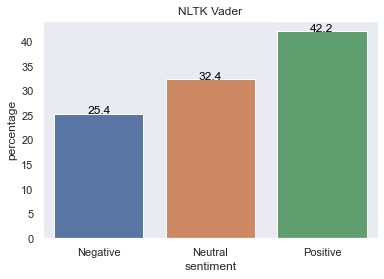

In [138]:
sns.set_theme(style="dark")
ax = sns.barplot(x="sentiment", y="percentage", data=nltk_sentiment_df)
ax.set_title('NLTK Vader')

for index, row in nltk_sentiment_df.iterrows():
    ax.text(row.name,row.percentage, round(row.percentage,1), color='black', ha="center")

___
<a name="sentiment_textblob"></a>
## Part 3B - Sentiment Analysis with TextBlob
TextBlob is a popular Python library used to process textual data and perform a range of NLP tasks including sentiment analysis. Similar to NLTK Vader, the TextBlob sentiment classifier is also based on a bag of words approach. In fact, TextBlob is built upon the NLTK and pattern libraries.

This is the command to install TextBlob: `pip install textblob`

The NaiveBayesAnalyzer is trained on movies review dataset, so I will be using the default PatternAnalyzer instead

In [139]:
# Obtain polarity scores generated by TextBlob
tweets_df['textblob_score'] = tweets_df['text_cleaned'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [140]:
neutral_thresh = 0.05

In [141]:
# Convert polarity score into sentiment categories
tweets_df['textblob_sentiment'] = tweets_df['textblob_score'].apply(lambda c: 'Positive' if c >= neutral_thresh else ('Negative' if c <= -(neutral_thresh) else 'Neutral'))

# Neutral score = 0
#tweets_df['textblob_sentiment'] = tweets_df['textblob_score'].apply(lambda c: 'Positive' if c > 0 else ('Negative' if c < 0 else 'Neutral'))

In [142]:
tweets_df['textblob_score'].describe()

count    10727.000000
mean         0.111627
std          0.225055
min         -1.000000
25%          0.000000
50%          0.031818
75%          0.250000
max          1.000000
Name: textblob_score, dtype: float64

In [143]:
textblob_sentiment_df = get_value_counts('textblob_sentiment','TextBlob')
textblob_sentiment_df

,sentiment,counts,percentage,analyzer
0,Negative,1275,11.89,TextBlob
1,Neutral,4250,39.62,TextBlob
2,Positive,5202,48.49,TextBlob


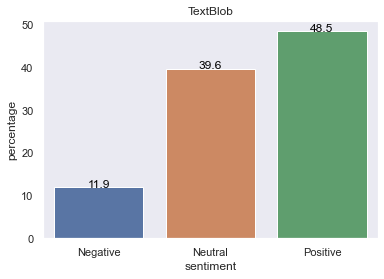

In [144]:
sns.set_theme(style="dark")
ax = sns.barplot(x="sentiment", y="percentage", data=textblob_sentiment_df)
ax.set_title('TextBlob')

for index, row in textblob_sentiment_df.iterrows():
    ax.text(row.name,row.percentage, round(row.percentage,1), color='black', ha="center")

___
<a name="sentiment_stanza"></a>
## Part 3C - Sentiment Analysis with Stanza
Stanza is the default Python NLP library of the Stanford NLP Group, replacing the older Java-based CoreNLP. The modules are built on top of PyTorch, and its pre-built sentiment analyzer is trained on several datasets, including the Stanford Sentiment Treeback and Airline Twitter Sentiment.

Score mapping:  
0: Negative  
1: Neutral  
2: Positive

In [145]:
nlp = stanza.Pipeline(lang='en', processors='tokenize,sentiment')

2021-01-25 15:59:27 INFO: Loading these models for language: en (English):
| Processor | Package |
-----------------------
| tokenize  | ewt     |
| sentiment | sstplus |

2021-01-25 15:59:27 INFO: Use device: cpu
2021-01-25 15:59:27 INFO: Loading: tokenize
2021-01-25 15:59:27 INFO: Loading: sentiment
2021-01-25 15:59:28 INFO: Done loading processors!


In [146]:
def stanza_analyze(Text):
    document = nlp(Text)
    print('Processing')
    return np.mean([(i.sentiment - 1) for i in document.sentences]) # Minus 1 so as to bring score range of [0,2] to [-1,1]

In [147]:
# Obtain sentiment categorical score generated by Stanza
tweets_df['stanza_score'] = tweets_df['text_cleaned'].apply(lambda x: stanza_analyze(x))

Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing

Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing

Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing

Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing

Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing

Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing

Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing

Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing

Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing

Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing

Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing

Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing

Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing

Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing

Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing

In [148]:
tweets_df['stanza_score'].describe()

count    10727.000000
mean        -0.206526
std          0.524390
min         -1.000000
25%         -0.500000
50%          0.000000
75%          0.000000
max          1.000000
Name: stanza_score, dtype: float64

In [149]:
neutral_thresh = 0.05

In [150]:
# Convert average Stanza sentiment score into sentiment categories
tweets_df['stanza_sentiment'] = tweets_df['stanza_score'].apply(lambda c: 'Positive' if c >= neutral_thresh else ('Negative' if c <= -(neutral_thresh) else 'Neutral'))

In [151]:
stanza_sentiment_df = get_value_counts('stanza_sentiment','Stanza')
stanza_sentiment_df

,sentiment,counts,percentage,analyzer
0,Negative,4580,42.70,Stanza
1,Neutral,4641,43.26,Stanza
2,Positive,1506,14.04,Stanza


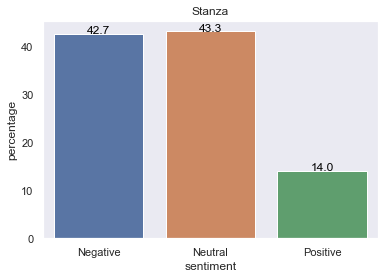

In [153]:
sns.set_theme(style="dark")
ax = sns.barplot(x="sentiment", y="percentage", data=stanza_sentiment_df)
ax.set_title('Stanza')

for index, row in stanza_sentiment_df.iterrows():
    ax.text(row.name,row.percentage, round(row.percentage,1), color='black', ha="center")

___
Note: Other libraries (i.e. FlairNLP (Part 3D) and Stanford CoreNLP (Part 3E)) were also explored. FlairNLP was omitted from analysis as it does not give Neutral classification. Stanford CoreNLP was omitted from analysis as it has been replaced by Stanza as Stanford NLP Group's default NLP library.

___
<a name="sentiment_flair"></a>
## Part 3D - Sentiment Analysis with FlairNLP
Flair pretrained sentiment analysis model is trained on IMDB movie reviews dataset

In [2]:
flair_clf = TextClassifier.load('en-sentiment')

2021-01-23 20:55:51,409 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_3.1.pt not found in cache, downloading to C:\Users\klty0\AppData\Local\Temp\tmp41cdp4pu


100%|████████████████████████████████████████████████████████████████| 266147697/266147697 [02:20<00:00, 1893866.24B/s]

2021-01-23 20:58:13,043 copying C:\Users\klty0\AppData\Local\Temp\tmp41cdp4pu to cache at C:\Users\klty0\.flair\models\sentiment-en-mix-distillbert_3.1.pt


2021-01-23 20:58:14,075 removing temp file C:\Users\klty0\AppData\Local\Temp\tmp41cdp4pu
2021-01-23 20:58:14,111 loading file C:\Users\klty0\.flair\models\sentiment-en-mix-distillbert_3.1.pt


In [24]:
# Create function to run flair sentiment analyzer
def flair_analyze(Text):
    sentence = Sentence(Text)
    flair_clf.predict(sentence)
    flair_senti = sentence.labels
    return flair_senti

In [25]:
# Obtain sentiment scores generated by FlairNLP
tweets_df['flair_output'] = tweets_df['text_cleaned'].apply(lambda x: flair_analyze(x))

In [39]:
tweets_df['flair_output'] = tweets_df['flair_output'].astype(str)

In [43]:
def extract_flair_senti(output):
    sentiment = " ".join(re.findall("[a-zA-Z]+", output))
    sentiment = sentiment.capitalize()
    return sentiment

def extract_flair_score(output):
    score = ".".join(re.findall(r"\d+", output)) 
    return score

In [44]:
# Get flair sentiment and polarity score
tweets_df['flair_sentiment'] = tweets_df['flair_output'].apply(lambda x:extract_flair_senti(x))
tweets_df['flair_score'] = tweets_df['flair_output'].apply(lambda x:extract_flair_score(x))

In [96]:
flair_sentiment_df = get_value_counts('flair_sentiment','Flair')
flair_sentiment_df

,sentiment,counts,percentage,analyzer
0,Negative,7343,60.31,Flair
1,Positive,4832,39.69,Flair


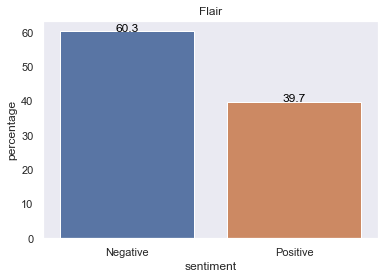

In [97]:
sns.set_theme(style="dark")
ax = sns.barplot(x="sentiment", y="percentage", data=flair_sentiment_df)
ax.set_title('Flair')

for index, row in flair_sentiment_df.iterrows():
    ax.text(row.name,row.percentage, round(row.percentage,1), color='black', ha="center")

___
<a name="sentiment_corenlp"></a>
## Part 3E- Sentiment Analysis with Stanford CoreNLP

**IMPORTANT NOTE:  
Instead of CoreNLP, Stanza (https://stanfordnlp.github.io/stanza/#getting-started) is now Stanford NLP Group's official Python NLP library**

See this article for detailed CoreNLP setup for all OS: https://towardsdatascience.com/natural-language-processing-using-stanfords-corenlp-d9e64c1e1024

The steps I took (for my Windows system) were:  

1. Download CoreNLP package files from http://nlp.stanford.edu/software/stanford-corenlp-latest.zip  

2. Unzip the zip file and note the path where these files are stored (e.g. `D:\Program Files\stanford-corenlp-4.2.0`)  

3. Open Command Prompt and change the directory to where the files are (i.e. `cd 'D:\Program Files\stanford-corenlp-4.2.0'`)  

4. Run the following: `java -mx4g -cp "*" edu.stanford.nlp.pipeline.StanfordCoreNLPServer -timeout 5000`

5. Lastly, `pip install pycorenlp`

Official Stanford CoreNLP site: https://stanfordnlp.github.io/CoreNLP/download.html#steps-to-setup-from-the-official-release

In [136]:
nlp = StanfordCoreNLP('http://localhost:9000')

For nlp output, the sentiment outputs are 'sentiment', 'sentimentValue' and 'sentimentDistribution'. "sentimentDistribution" returns an array of the probabilities of each of the 5 sentiments

In [370]:
def get_sentiment_score(text):
    output = nlp.annotate(text,
                          properties={'annotators': 'sentiment',
                                      'outputFormat': 'json',
                                      'timeout': 100000,
                       })
    
    return (output['sentences'][0]['sentimentValue'])

In [372]:
corenlp_senti_scores = []

for i in range(len(tweets_df)):
    sentiment = get_sentiment_score(tweets_df['text_cleaned'][i]) 
    corenlp_senti_scores.append(sentiment)
    print(f"Processed row {i}")

Processed row 0
Processed row 1
Processed row 2
Processed row 3
Processed row 4
Processed row 5
Processed row 6
Processed row 7
Processed row 8
Processed row 9
Processed row 10
Processed row 11
Processed row 12
Processed row 13
Processed row 14
Processed row 15
Processed row 16
Processed row 17
Processed row 18
Processed row 19
Processed row 20
Processed row 21
Processed row 22
Processed row 23
Processed row 24
Processed row 25
Processed row 26
Processed row 27
Processed row 28
Processed row 29
Processed row 30
Processed row 31
Processed row 32
Processed row 33
Processed row 34
Processed row 35
Processed row 36
Processed row 37
Processed row 38
Processed row 39
Processed row 40
Processed row 41
Processed row 42
Processed row 43
Processed row 44
Processed row 45
Processed row 46
Processed row 47
Processed row 48
Processed row 49
Processed row 50
Processed row 51
Processed row 52
Processed row 53
Processed row 54
Processed row 55
Processed row 56
Processed row 57
Processed row 58
Process

Processed row 462
Processed row 463
Processed row 464
Processed row 465
Processed row 466
Processed row 467
Processed row 468
Processed row 469
Processed row 470
Processed row 471
Processed row 472
Processed row 473
Processed row 474
Processed row 475
Processed row 476
Processed row 477
Processed row 478
Processed row 479
Processed row 480
Processed row 481
Processed row 482
Processed row 483
Processed row 484
Processed row 485
Processed row 486
Processed row 487
Processed row 488
Processed row 489
Processed row 490
Processed row 491
Processed row 492
Processed row 493
Processed row 494
Processed row 495
Processed row 496
Processed row 497
Processed row 498
Processed row 499
Processed row 500
Processed row 501
Processed row 502
Processed row 503
Processed row 504
Processed row 505
Processed row 506
Processed row 507
Processed row 508
Processed row 509
Processed row 510
Processed row 511
Processed row 512
Processed row 513
Processed row 514
Processed row 515
Processed row 516
Processed 

Processed row 918
Processed row 919
Processed row 920
Processed row 921
Processed row 922
Processed row 923
Processed row 924
Processed row 925
Processed row 926
Processed row 927
Processed row 928
Processed row 929
Processed row 930
Processed row 931
Processed row 932
Processed row 933
Processed row 934
Processed row 935
Processed row 936
Processed row 937
Processed row 938
Processed row 939
Processed row 940
Processed row 941
Processed row 942
Processed row 943
Processed row 944
Processed row 945
Processed row 946
Processed row 947
Processed row 948
Processed row 949
Processed row 950
Processed row 951
Processed row 952
Processed row 953
Processed row 954
Processed row 955
Processed row 956
Processed row 957
Processed row 958
Processed row 959
Processed row 960
Processed row 961
Processed row 962
Processed row 963
Processed row 964
Processed row 965
Processed row 966
Processed row 967
Processed row 968
Processed row 969
Processed row 970
Processed row 971
Processed row 972
Processed 

Processed row 1355
Processed row 1356
Processed row 1357
Processed row 1358
Processed row 1359
Processed row 1360
Processed row 1361
Processed row 1362
Processed row 1363
Processed row 1364
Processed row 1365
Processed row 1366
Processed row 1367
Processed row 1368
Processed row 1369
Processed row 1370
Processed row 1371
Processed row 1372
Processed row 1373
Processed row 1374
Processed row 1375
Processed row 1376
Processed row 1377
Processed row 1378
Processed row 1379
Processed row 1380
Processed row 1381
Processed row 1382
Processed row 1383
Processed row 1384
Processed row 1385
Processed row 1386
Processed row 1387
Processed row 1388
Processed row 1389
Processed row 1390
Processed row 1391
Processed row 1392
Processed row 1393
Processed row 1394
Processed row 1395
Processed row 1396
Processed row 1397
Processed row 1398
Processed row 1399
Processed row 1400
Processed row 1401
Processed row 1402
Processed row 1403
Processed row 1404
Processed row 1405
Processed row 1406
Processed ro

Processed row 1787
Processed row 1788
Processed row 1789
Processed row 1790
Processed row 1791
Processed row 1792
Processed row 1793
Processed row 1794
Processed row 1795
Processed row 1796
Processed row 1797
Processed row 1798
Processed row 1799
Processed row 1800
Processed row 1801
Processed row 1802
Processed row 1803
Processed row 1804
Processed row 1805
Processed row 1806
Processed row 1807
Processed row 1808
Processed row 1809
Processed row 1810
Processed row 1811
Processed row 1812
Processed row 1813
Processed row 1814
Processed row 1815
Processed row 1816
Processed row 1817
Processed row 1818
Processed row 1819
Processed row 1820
Processed row 1821
Processed row 1822
Processed row 1823
Processed row 1824
Processed row 1825
Processed row 1826
Processed row 1827
Processed row 1828
Processed row 1829
Processed row 1830
Processed row 1831
Processed row 1832
Processed row 1833
Processed row 1834
Processed row 1835
Processed row 1836
Processed row 1837
Processed row 1838
Processed ro

Processed row 2219
Processed row 2220
Processed row 2221
Processed row 2222
Processed row 2223
Processed row 2224
Processed row 2225
Processed row 2226
Processed row 2227
Processed row 2228
Processed row 2229
Processed row 2230
Processed row 2231
Processed row 2232
Processed row 2233
Processed row 2234
Processed row 2235
Processed row 2236
Processed row 2237
Processed row 2238
Processed row 2239
Processed row 2240
Processed row 2241
Processed row 2242
Processed row 2243
Processed row 2244
Processed row 2245
Processed row 2246
Processed row 2247
Processed row 2248
Processed row 2249
Processed row 2250
Processed row 2251
Processed row 2252
Processed row 2253
Processed row 2254
Processed row 2255
Processed row 2256
Processed row 2257
Processed row 2258
Processed row 2259
Processed row 2260
Processed row 2261
Processed row 2262
Processed row 2263
Processed row 2264
Processed row 2265
Processed row 2266
Processed row 2267
Processed row 2268
Processed row 2269
Processed row 2270
Processed ro

Processed row 2651
Processed row 2652
Processed row 2653
Processed row 2654
Processed row 2655
Processed row 2656
Processed row 2657
Processed row 2658
Processed row 2659
Processed row 2660
Processed row 2661
Processed row 2662
Processed row 2663
Processed row 2664
Processed row 2665
Processed row 2666
Processed row 2667
Processed row 2668
Processed row 2669
Processed row 2670
Processed row 2671
Processed row 2672
Processed row 2673
Processed row 2674
Processed row 2675
Processed row 2676
Processed row 2677
Processed row 2678
Processed row 2679
Processed row 2680
Processed row 2681
Processed row 2682
Processed row 2683
Processed row 2684
Processed row 2685
Processed row 2686
Processed row 2687
Processed row 2688
Processed row 2689
Processed row 2690
Processed row 2691
Processed row 2692
Processed row 2693
Processed row 2694
Processed row 2695
Processed row 2696
Processed row 2697
Processed row 2698
Processed row 2699
Processed row 2700
Processed row 2701
Processed row 2702
Processed ro

Processed row 3088
Processed row 3089
Processed row 3090
Processed row 3091
Processed row 3092
Processed row 3093
Processed row 3094
Processed row 3095
Processed row 3096
Processed row 3097
Processed row 3098
Processed row 3099
Processed row 3100
Processed row 3101
Processed row 3102
Processed row 3103
Processed row 3104
Processed row 3105
Processed row 3106
Processed row 3107
Processed row 3108
Processed row 3109
Processed row 3110
Processed row 3111
Processed row 3112
Processed row 3113
Processed row 3114
Processed row 3115
Processed row 3116
Processed row 3117
Processed row 3118
Processed row 3119
Processed row 3120
Processed row 3121
Processed row 3122
Processed row 3123
Processed row 3124
Processed row 3125
Processed row 3126
Processed row 3127
Processed row 3128
Processed row 3129
Processed row 3130
Processed row 3131
Processed row 3132
Processed row 3133
Processed row 3134
Processed row 3135
Processed row 3136
Processed row 3137
Processed row 3138
Processed row 3139
Processed ro

Processed row 3520
Processed row 3521
Processed row 3522
Processed row 3523
Processed row 3524
Processed row 3525
Processed row 3526
Processed row 3527
Processed row 3528
Processed row 3529
Processed row 3530
Processed row 3531
Processed row 3532
Processed row 3533
Processed row 3534
Processed row 3535
Processed row 3536
Processed row 3537
Processed row 3538
Processed row 3539
Processed row 3540
Processed row 3541
Processed row 3542
Processed row 3543
Processed row 3544
Processed row 3545
Processed row 3546
Processed row 3547
Processed row 3548
Processed row 3549
Processed row 3550
Processed row 3551
Processed row 3552
Processed row 3553
Processed row 3554
Processed row 3555
Processed row 3556
Processed row 3557
Processed row 3558
Processed row 3559
Processed row 3560
Processed row 3561
Processed row 3562
Processed row 3563
Processed row 3564
Processed row 3565
Processed row 3566
Processed row 3567
Processed row 3568
Processed row 3569
Processed row 3570
Processed row 3571
Processed ro

Processed row 3952
Processed row 3953
Processed row 3954
Processed row 3955
Processed row 3956
Processed row 3957
Processed row 3958
Processed row 3959
Processed row 3960
Processed row 3961
Processed row 3962
Processed row 3963
Processed row 3964
Processed row 3965
Processed row 3966
Processed row 3967
Processed row 3968
Processed row 3969
Processed row 3970
Processed row 3971
Processed row 3972
Processed row 3973
Processed row 3974
Processed row 3975
Processed row 3976
Processed row 3977
Processed row 3978
Processed row 3979
Processed row 3980
Processed row 3981
Processed row 3982
Processed row 3983
Processed row 3984
Processed row 3985
Processed row 3986
Processed row 3987
Processed row 3988
Processed row 3989
Processed row 3990
Processed row 3991
Processed row 3992
Processed row 3993
Processed row 3994
Processed row 3995
Processed row 3996
Processed row 3997
Processed row 3998
Processed row 3999
Processed row 4000
Processed row 4001
Processed row 4002
Processed row 4003
Processed ro

Processed row 4384
Processed row 4385
Processed row 4386
Processed row 4387
Processed row 4388
Processed row 4389
Processed row 4390
Processed row 4391
Processed row 4392
Processed row 4393
Processed row 4394
Processed row 4395
Processed row 4396
Processed row 4397
Processed row 4398
Processed row 4399
Processed row 4400
Processed row 4401
Processed row 4402
Processed row 4403
Processed row 4404
Processed row 4405
Processed row 4406
Processed row 4407
Processed row 4408
Processed row 4409
Processed row 4410
Processed row 4411
Processed row 4412
Processed row 4413
Processed row 4414
Processed row 4415
Processed row 4416
Processed row 4417
Processed row 4418
Processed row 4419
Processed row 4420
Processed row 4421
Processed row 4422
Processed row 4423
Processed row 4424
Processed row 4425
Processed row 4426
Processed row 4427
Processed row 4428
Processed row 4429
Processed row 4430
Processed row 4431
Processed row 4432
Processed row 4433
Processed row 4434
Processed row 4435
Processed ro

Processed row 4816
Processed row 4817
Processed row 4818
Processed row 4819
Processed row 4820
Processed row 4821
Processed row 4822
Processed row 4823
Processed row 4824
Processed row 4825
Processed row 4826
Processed row 4827
Processed row 4828
Processed row 4829
Processed row 4830
Processed row 4831
Processed row 4832
Processed row 4833
Processed row 4834
Processed row 4835
Processed row 4836
Processed row 4837
Processed row 4838
Processed row 4839
Processed row 4840
Processed row 4841
Processed row 4842
Processed row 4843
Processed row 4844
Processed row 4845
Processed row 4846
Processed row 4847
Processed row 4848
Processed row 4849
Processed row 4850
Processed row 4851
Processed row 4852
Processed row 4853
Processed row 4854
Processed row 4855
Processed row 4856
Processed row 4857
Processed row 4858
Processed row 4859
Processed row 4860
Processed row 4861
Processed row 4862
Processed row 4863
Processed row 4864
Processed row 4865
Processed row 4866
Processed row 4867
Processed ro

Processed row 5249
Processed row 5250
Processed row 5251
Processed row 5252
Processed row 5253
Processed row 5254
Processed row 5255
Processed row 5256
Processed row 5257
Processed row 5258
Processed row 5259
Processed row 5260
Processed row 5261
Processed row 5262
Processed row 5263
Processed row 5264
Processed row 5265
Processed row 5266
Processed row 5267
Processed row 5268
Processed row 5269
Processed row 5270
Processed row 5271
Processed row 5272
Processed row 5273
Processed row 5274
Processed row 5275
Processed row 5276
Processed row 5277
Processed row 5278
Processed row 5279
Processed row 5280
Processed row 5281
Processed row 5282
Processed row 5283
Processed row 5284
Processed row 5285
Processed row 5286
Processed row 5287
Processed row 5288
Processed row 5289
Processed row 5290
Processed row 5291
Processed row 5292
Processed row 5293
Processed row 5294
Processed row 5295
Processed row 5296
Processed row 5297
Processed row 5298
Processed row 5299
Processed row 5300
Processed ro

Processed row 5681
Processed row 5682
Processed row 5683
Processed row 5684
Processed row 5685
Processed row 5686
Processed row 5687
Processed row 5688
Processed row 5689
Processed row 5690
Processed row 5691
Processed row 5692
Processed row 5693
Processed row 5694
Processed row 5695
Processed row 5696
Processed row 5697
Processed row 5698
Processed row 5699
Processed row 5700
Processed row 5701
Processed row 5702
Processed row 5703
Processed row 5704
Processed row 5705
Processed row 5706
Processed row 5707
Processed row 5708
Processed row 5709
Processed row 5710
Processed row 5711
Processed row 5712
Processed row 5713
Processed row 5714
Processed row 5715
Processed row 5716
Processed row 5717
Processed row 5718
Processed row 5719
Processed row 5720
Processed row 5721
Processed row 5722
Processed row 5723
Processed row 5724
Processed row 5725
Processed row 5726
Processed row 5727
Processed row 5728
Processed row 5729
Processed row 5730
Processed row 5731
Processed row 5732
Processed ro

Processed row 6114
Processed row 6115
Processed row 6116
Processed row 6117
Processed row 6118
Processed row 6119
Processed row 6120
Processed row 6121
Processed row 6122
Processed row 6123
Processed row 6124
Processed row 6125
Processed row 6126
Processed row 6127
Processed row 6128
Processed row 6129
Processed row 6130
Processed row 6131
Processed row 6132
Processed row 6133
Processed row 6134
Processed row 6135
Processed row 6136
Processed row 6137
Processed row 6138
Processed row 6139
Processed row 6140
Processed row 6141
Processed row 6142
Processed row 6143
Processed row 6144
Processed row 6145
Processed row 6146
Processed row 6147
Processed row 6148
Processed row 6149
Processed row 6150
Processed row 6151
Processed row 6152
Processed row 6153
Processed row 6154
Processed row 6155
Processed row 6156
Processed row 6157
Processed row 6158
Processed row 6159
Processed row 6160
Processed row 6161
Processed row 6162
Processed row 6163
Processed row 6164
Processed row 6165
Processed ro

Processed row 6547
Processed row 6548
Processed row 6549
Processed row 6550
Processed row 6551
Processed row 6552
Processed row 6553
Processed row 6554
Processed row 6555
Processed row 6556
Processed row 6557
Processed row 6558
Processed row 6559
Processed row 6560
Processed row 6561
Processed row 6562
Processed row 6563
Processed row 6564
Processed row 6565
Processed row 6566
Processed row 6567
Processed row 6568
Processed row 6569
Processed row 6570
Processed row 6571
Processed row 6572
Processed row 6573
Processed row 6574
Processed row 6575
Processed row 6576
Processed row 6577
Processed row 6578
Processed row 6579
Processed row 6580
Processed row 6581
Processed row 6582
Processed row 6583
Processed row 6584
Processed row 6585
Processed row 6586
Processed row 6587
Processed row 6588
Processed row 6589
Processed row 6590
Processed row 6591
Processed row 6592
Processed row 6593
Processed row 6594
Processed row 6595
Processed row 6596
Processed row 6597
Processed row 6598
Processed ro

Processed row 6980
Processed row 6981
Processed row 6982
Processed row 6983
Processed row 6984
Processed row 6985
Processed row 6986
Processed row 6987
Processed row 6988
Processed row 6989
Processed row 6990
Processed row 6991
Processed row 6992
Processed row 6993
Processed row 6994
Processed row 6995
Processed row 6996
Processed row 6997
Processed row 6998
Processed row 6999
Processed row 7000
Processed row 7001
Processed row 7002
Processed row 7003
Processed row 7004
Processed row 7005
Processed row 7006
Processed row 7007
Processed row 7008
Processed row 7009
Processed row 7010
Processed row 7011
Processed row 7012
Processed row 7013
Processed row 7014
Processed row 7015
Processed row 7016
Processed row 7017
Processed row 7018
Processed row 7019
Processed row 7020
Processed row 7021
Processed row 7022
Processed row 7023
Processed row 7024
Processed row 7025
Processed row 7026
Processed row 7027
Processed row 7028
Processed row 7029
Processed row 7030
Processed row 7031
Processed ro

Processed row 7413
Processed row 7414
Processed row 7415
Processed row 7416
Processed row 7417
Processed row 7418
Processed row 7419
Processed row 7420
Processed row 7421
Processed row 7422
Processed row 7423
Processed row 7424
Processed row 7425
Processed row 7426
Processed row 7427
Processed row 7428
Processed row 7429
Processed row 7430
Processed row 7431
Processed row 7432
Processed row 7433
Processed row 7434
Processed row 7435
Processed row 7436
Processed row 7437
Processed row 7438
Processed row 7439
Processed row 7440
Processed row 7441
Processed row 7442
Processed row 7443
Processed row 7444
Processed row 7445
Processed row 7446
Processed row 7447
Processed row 7448
Processed row 7449
Processed row 7450
Processed row 7451
Processed row 7452
Processed row 7453
Processed row 7454
Processed row 7455
Processed row 7456
Processed row 7457
Processed row 7458
Processed row 7459
Processed row 7460
Processed row 7461
Processed row 7462
Processed row 7463
Processed row 7464
Processed ro

Processed row 7847
Processed row 7848
Processed row 7849
Processed row 7850
Processed row 7851
Processed row 7852
Processed row 7853
Processed row 7854
Processed row 7855
Processed row 7856
Processed row 7857
Processed row 7858
Processed row 7859
Processed row 7860
Processed row 7861
Processed row 7862
Processed row 7863
Processed row 7864
Processed row 7865
Processed row 7866
Processed row 7867
Processed row 7868
Processed row 7869
Processed row 7870
Processed row 7871
Processed row 7872
Processed row 7873
Processed row 7874
Processed row 7875
Processed row 7876
Processed row 7877
Processed row 7878
Processed row 7879
Processed row 7880
Processed row 7881
Processed row 7882
Processed row 7883
Processed row 7884
Processed row 7885
Processed row 7886
Processed row 7887
Processed row 7888
Processed row 7889
Processed row 7890
Processed row 7891
Processed row 7892
Processed row 7893
Processed row 7894
Processed row 7895
Processed row 7896
Processed row 7897
Processed row 7898
Processed ro

Processed row 8279
Processed row 8280
Processed row 8281
Processed row 8282
Processed row 8283
Processed row 8284
Processed row 8285
Processed row 8286
Processed row 8287
Processed row 8288
Processed row 8289
Processed row 8290
Processed row 8291
Processed row 8292
Processed row 8293
Processed row 8294
Processed row 8295
Processed row 8296
Processed row 8297
Processed row 8298
Processed row 8299
Processed row 8300
Processed row 8301
Processed row 8302
Processed row 8303
Processed row 8304
Processed row 8305
Processed row 8306
Processed row 8307
Processed row 8308
Processed row 8309
Processed row 8310
Processed row 8311
Processed row 8312
Processed row 8313
Processed row 8314
Processed row 8315
Processed row 8316
Processed row 8317
Processed row 8318
Processed row 8319
Processed row 8320
Processed row 8321
Processed row 8322
Processed row 8323
Processed row 8324
Processed row 8325
Processed row 8326
Processed row 8327
Processed row 8328
Processed row 8329
Processed row 8330
Processed ro

Processed row 8713
Processed row 8714
Processed row 8715
Processed row 8716
Processed row 8717
Processed row 8718
Processed row 8719
Processed row 8720
Processed row 8721
Processed row 8722
Processed row 8723
Processed row 8724
Processed row 8725
Processed row 8726
Processed row 8727
Processed row 8728
Processed row 8729
Processed row 8730
Processed row 8731
Processed row 8732
Processed row 8733
Processed row 8734
Processed row 8735
Processed row 8736
Processed row 8737
Processed row 8738
Processed row 8739
Processed row 8740
Processed row 8741
Processed row 8742
Processed row 8743
Processed row 8744
Processed row 8745
Processed row 8746
Processed row 8747
Processed row 8748
Processed row 8749
Processed row 8750
Processed row 8751
Processed row 8752
Processed row 8753
Processed row 8754
Processed row 8755
Processed row 8756
Processed row 8757
Processed row 8758
Processed row 8759
Processed row 8760
Processed row 8761
Processed row 8762
Processed row 8763
Processed row 8764
Processed ro

Processed row 9147
Processed row 9148
Processed row 9149
Processed row 9150
Processed row 9151
Processed row 9152
Processed row 9153
Processed row 9154
Processed row 9155
Processed row 9156
Processed row 9157
Processed row 9158
Processed row 9159
Processed row 9160
Processed row 9161
Processed row 9162
Processed row 9163
Processed row 9164
Processed row 9165
Processed row 9166
Processed row 9167
Processed row 9168
Processed row 9169
Processed row 9170
Processed row 9171
Processed row 9172
Processed row 9173
Processed row 9174
Processed row 9175
Processed row 9176
Processed row 9177
Processed row 9178
Processed row 9179
Processed row 9180
Processed row 9181
Processed row 9182
Processed row 9183
Processed row 9184
Processed row 9185
Processed row 9186
Processed row 9187
Processed row 9188
Processed row 9189
Processed row 9190
Processed row 9191
Processed row 9192
Processed row 9193
Processed row 9194
Processed row 9195
Processed row 9196
Processed row 9197
Processed row 9198
Processed ro

Processed row 9579
Processed row 9580
Processed row 9581
Processed row 9582
Processed row 9583
Processed row 9584
Processed row 9585
Processed row 9586
Processed row 9587
Processed row 9588
Processed row 9589
Processed row 9590
Processed row 9591
Processed row 9592
Processed row 9593
Processed row 9594
Processed row 9595
Processed row 9596
Processed row 9597
Processed row 9598
Processed row 9599
Processed row 9600
Processed row 9601
Processed row 9602
Processed row 9603
Processed row 9604
Processed row 9605
Processed row 9606
Processed row 9607
Processed row 9608
Processed row 9609
Processed row 9610
Processed row 9611
Processed row 9612
Processed row 9613
Processed row 9614
Processed row 9615
Processed row 9616
Processed row 9617
Processed row 9618
Processed row 9619
Processed row 9620
Processed row 9621
Processed row 9622
Processed row 9623
Processed row 9624
Processed row 9625
Processed row 9626
Processed row 9627
Processed row 9628
Processed row 9629
Processed row 9630
Processed ro

Processed row 10011
Processed row 10012
Processed row 10013
Processed row 10014
Processed row 10015
Processed row 10016
Processed row 10017
Processed row 10018
Processed row 10019
Processed row 10020
Processed row 10021
Processed row 10022
Processed row 10023
Processed row 10024
Processed row 10025
Processed row 10026
Processed row 10027
Processed row 10028
Processed row 10029
Processed row 10030
Processed row 10031
Processed row 10032
Processed row 10033
Processed row 10034
Processed row 10035
Processed row 10036
Processed row 10037
Processed row 10038
Processed row 10039
Processed row 10040
Processed row 10041
Processed row 10042
Processed row 10043
Processed row 10044
Processed row 10045
Processed row 10046
Processed row 10047
Processed row 10048
Processed row 10049
Processed row 10050
Processed row 10051
Processed row 10052
Processed row 10053
Processed row 10054
Processed row 10055
Processed row 10056
Processed row 10057
Processed row 10058
Processed row 10059
Processed row 10060


Processed row 10422
Processed row 10423
Processed row 10424
Processed row 10425
Processed row 10426
Processed row 10427
Processed row 10428
Processed row 10429
Processed row 10430
Processed row 10431
Processed row 10432
Processed row 10433
Processed row 10434
Processed row 10435
Processed row 10436
Processed row 10437
Processed row 10438
Processed row 10439
Processed row 10440
Processed row 10441
Processed row 10442
Processed row 10443
Processed row 10444
Processed row 10445
Processed row 10446
Processed row 10447
Processed row 10448
Processed row 10449
Processed row 10450
Processed row 10451
Processed row 10452
Processed row 10453
Processed row 10454
Processed row 10455
Processed row 10456
Processed row 10457
Processed row 10458
Processed row 10459
Processed row 10460
Processed row 10461
Processed row 10462
Processed row 10463
Processed row 10464
Processed row 10465
Processed row 10466
Processed row 10467
Processed row 10468
Processed row 10469
Processed row 10470
Processed row 10471


Processed row 10832
Processed row 10833
Processed row 10834
Processed row 10835
Processed row 10836
Processed row 10837
Processed row 10838
Processed row 10839
Processed row 10840
Processed row 10841
Processed row 10842
Processed row 10843
Processed row 10844
Processed row 10845
Processed row 10846
Processed row 10847
Processed row 10848
Processed row 10849
Processed row 10850
Processed row 10851
Processed row 10852
Processed row 10853
Processed row 10854
Processed row 10855
Processed row 10856
Processed row 10857
Processed row 10858
Processed row 10859
Processed row 10860
Processed row 10861
Processed row 10862
Processed row 10863
Processed row 10864
Processed row 10865
Processed row 10866
Processed row 10867
Processed row 10868
Processed row 10869
Processed row 10870
Processed row 10871
Processed row 10872
Processed row 10873
Processed row 10874
Processed row 10875
Processed row 10876
Processed row 10877
Processed row 10878
Processed row 10879
Processed row 10880
Processed row 10881


Processed row 11242
Processed row 11243
Processed row 11244
Processed row 11245
Processed row 11246
Processed row 11247
Processed row 11248
Processed row 11249
Processed row 11250
Processed row 11251
Processed row 11252
Processed row 11253
Processed row 11254
Processed row 11255
Processed row 11256
Processed row 11257
Processed row 11258
Processed row 11259
Processed row 11260
Processed row 11261
Processed row 11262
Processed row 11263
Processed row 11264
Processed row 11265
Processed row 11266
Processed row 11267
Processed row 11268
Processed row 11269
Processed row 11270
Processed row 11271
Processed row 11272
Processed row 11273
Processed row 11274
Processed row 11275
Processed row 11276
Processed row 11277
Processed row 11278
Processed row 11279
Processed row 11280
Processed row 11281
Processed row 11282
Processed row 11283
Processed row 11284
Processed row 11285
Processed row 11286
Processed row 11287
Processed row 11288
Processed row 11289
Processed row 11290
Processed row 11291


Processed row 11653
Processed row 11654
Processed row 11655
Processed row 11656
Processed row 11657
Processed row 11658
Processed row 11659
Processed row 11660
Processed row 11661
Processed row 11662
Processed row 11663
Processed row 11664
Processed row 11665
Processed row 11666
Processed row 11667
Processed row 11668
Processed row 11669
Processed row 11670
Processed row 11671
Processed row 11672
Processed row 11673
Processed row 11674
Processed row 11675
Processed row 11676
Processed row 11677
Processed row 11678
Processed row 11679
Processed row 11680
Processed row 11681
Processed row 11682
Processed row 11683
Processed row 11684
Processed row 11685
Processed row 11686
Processed row 11687
Processed row 11688
Processed row 11689
Processed row 11690
Processed row 11691
Processed row 11692
Processed row 11693
Processed row 11694
Processed row 11695
Processed row 11696
Processed row 11697
Processed row 11698
Processed row 11699
Processed row 11700
Processed row 11701
Processed row 11702


Processed row 12065
Processed row 12066
Processed row 12067
Processed row 12068
Processed row 12069
Processed row 12070
Processed row 12071
Processed row 12072
Processed row 12073
Processed row 12074
Processed row 12075
Processed row 12076
Processed row 12077
Processed row 12078
Processed row 12079
Processed row 12080
Processed row 12081
Processed row 12082
Processed row 12083
Processed row 12084
Processed row 12085
Processed row 12086
Processed row 12087
Processed row 12088
Processed row 12089
Processed row 12090
Processed row 12091
Processed row 12092
Processed row 12093
Processed row 12094
Processed row 12095
Processed row 12096
Processed row 12097
Processed row 12098
Processed row 12099
Processed row 12100
Processed row 12101
Processed row 12102
Processed row 12103
Processed row 12104
Processed row 12105
Processed row 12106
Processed row 12107
Processed row 12108
Processed row 12109
Processed row 12110
Processed row 12111
Processed row 12112
Processed row 12113
Processed row 12114


In [398]:
corenlp_senti_scores_df = pd.DataFrame(corenlp_senti_scores, columns = ["corenlp_score"])
corenlp_senti_scores_df["corenlp_score"] = pd.to_numeric(corenlp_senti_scores_df["corenlp_score"])
corenlp_senti_scores_df["corenlp_score"].unique()

array([2, 1, 3, 0, 4], dtype=int64)

These CoreNLP scores correspond to the following:  
0: Very Negative  
1: Negative  
2: Neutral  
3: Positive  
4: Very Positive

In [399]:
# Concatenate both dataframes
tweets_df = pd.concat([tweets_df, corenlp_senti_scores_df], axis=1)

# Map CoreNLP sentiments to scores
corenlp_mapping = {0:'Negative',1:'Negative',2:'Neutral',3:'Positive',4:'Positive'}

tweets_df['corenlp_sentiment'] = tweets_df['corenlp_score'].map(corenlp_mapping)

In [104]:
corenlp_sentiment_df = get_value_counts('corenlp_sentiment','CoreNLP')
corenlp_sentiment_df

,sentiment,counts,percentage,analyzer
0,Negative,3790,31.13,CoreNLP
1,Neutral,6029,49.52,CoreNLP
2,Positive,2356,19.35,CoreNLP


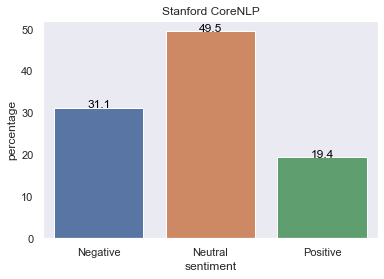

In [105]:
sns.set_theme(style="dark")
ax = sns.barplot(x="sentiment", y="percentage", data=corenlp_sentiment_df)
ax.set_title('Stanford CoreNLP')

for index, row in corenlp_sentiment_df.iterrows():
    ax.text(row.name,row.percentage, round(row.percentage,1), color='black', ha="center")

___
<a name="insights"></a>
## Part 4 - Insights from Sentiment Analyses
We will focus on the results from NLTK VADER, TextBlob and Stanza because they are:
- Trained on at least 1 social media dataset
- Able to give at least 3 classes of sentiments i.e. Positive, Neutral, Negative

In [154]:
df_sentiments = pd.concat([nltk_sentiment_df, 
                           textblob_sentiment_df, 
                           stanza_sentiment_df,
                           #flair_sentiment_df,
                           #corenlp_sentiment_df,
                          ]).reset_index(drop=True)
df_sentiments

,sentiment,counts,percentage,analyzer
0,Negative,2727,25.42,NLTK Vader
1,Neutral,3473,32.38,NLTK Vader
2,Positive,4527,42.20,NLTK Vader
3,Negative,1275,11.89,TextBlob
4,Neutral,4250,39.62,TextBlob
5,Positive,5202,48.49,TextBlob
6,Negative,4580,42.70,Stanza
7,Neutral,4641,43.26,Stanza
8,Positive,1506,14.04,Stanza


In [155]:
df_sentiments_pivot = df_sentiments.pivot(index='sentiment', columns='analyzer', values='percentage')
df_sentiments_pivot

analyzer,NLTK Vader,Stanza,TextBlob
sentiment,,,
Negative,25.42,42.70,11.89
Neutral,32.38,43.26,39.62
Positive,42.20,14.04,48.49


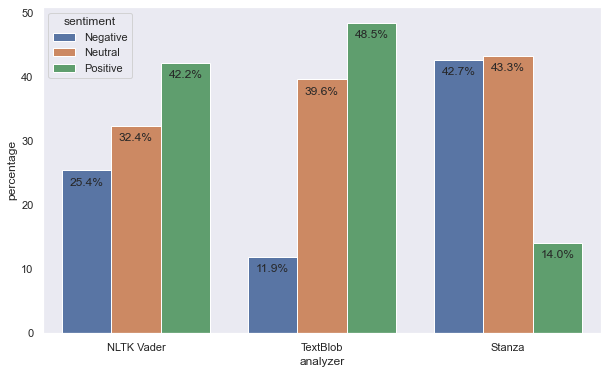

In [156]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x="analyzer", y="percentage",
                 hue="sentiment", data=df_sentiments)

# Display annotations
for p in ax.patches:
    ax.annotate(f"{round(p.get_height(),1)}%", 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

___
<a name="ensemble"></a>
## Part 5 - Compound Sentiment with Ensemble Method

#### Average Score
- Take average of the 3 sentiment scores of NLTK Vader, TextBlob and Stanza

In [162]:
# Make use of sentiments from NLTK Vader, TextBlob and Stanza
tweets_df['compound_score'] =  (tweets_df['nltk_cmp_score'] 
                                + tweets_df['textblob_score']
                                + tweets_df['stanza_score'])/3

In [163]:
tweets_df['compound_score'].describe()

count    10727.000000
mean        -0.002643
std          0.306620
min         -0.923900
25%         -0.214646
50%          0.000000
75%          0.166667
max          0.935667
Name: compound_score, dtype: float64

In [164]:
# Threshold for neutral sentiment
neutral_thresh = 0.05

In [165]:
# Convert average sentiment score (from all 3 analyzers) into sentiment categories
tweets_df['compound_vote_2'] = tweets_df['compound_score'].apply(lambda c: 'Positive' if c >= neutral_thresh else ('Negative' if c <= -(neutral_thresh) else 'Neutral'))

In [166]:
compound_sentiment_df_2 = get_value_counts('compound_vote_2','Compound Sentiment')
compound_sentiment_df_2

,sentiment,counts,percentage,analyzer
0,Negative,4120,38.41,Compound Sentiment
1,Neutral,2329,21.71,Compound Sentiment
2,Positive,4278,39.88,Compound Sentiment


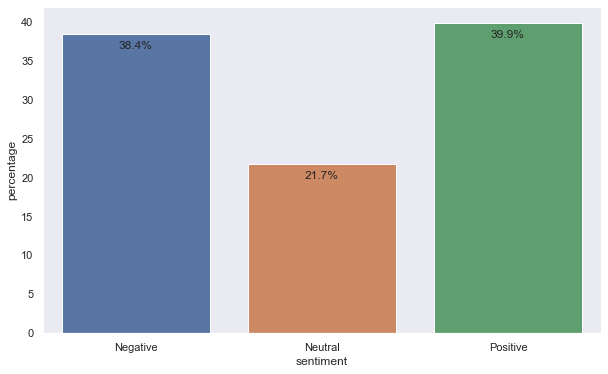

In [167]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x="sentiment", y="percentage",
                 data=compound_sentiment_df_2)

# Display annotations
for p in ax.patches:
    ax.annotate(f"{round(p.get_height(),1)}%", 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

___
#### Experiment: Max Voting
- Get compound sentiment by doing max voting amongst the 3 analyzers NLTK Vader, TextBlob and Stanza

In [50]:
# Make use of sentiments from NLTK Vader, TextBlob and Stanza
tweets_df['sentiment_votes'] =  tweets_df.apply(lambda x: list([x['nltk_sentiment'], 
                                                                x['textblob_sentiment'], 
                                                                x['stanza_sentiment']]),axis=1) 

In [51]:
# Create function to get sentiment that appears most often amongst the 3 votes
def get_most_voted_senti(List):
    if len(List) == len(set(List)): # If all elements are different
        return 'Neutral'
    else:
        return max(set(List), key = List.count)

In [52]:
# Get compound sentiment vote
tweets_df['compound_vote'] = tweets_df['sentiment_votes'].apply(lambda x: get_most_voted_senti(x))

In [53]:
compound_sentiment_df = get_value_counts('compound_vote','Compound Sentiment')
compound_sentiment_df

,sentiment,counts,percentage,analyzer
0,Negative,2641,23.48,Compound Sentiment
1,Neutral,5154,45.83,Compound Sentiment
2,Positive,3451,30.69,Compound Sentiment


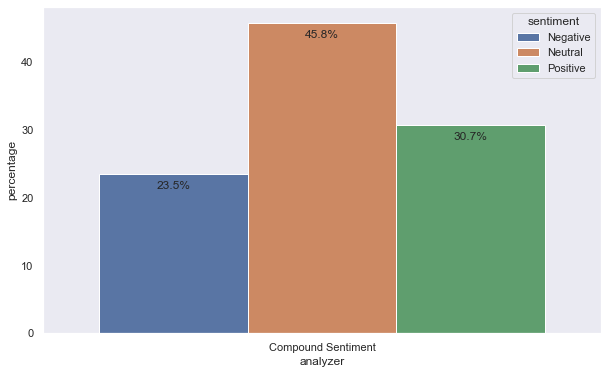

In [54]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x="analyzer", y="percentage",
                 hue="sentiment", data=compound_sentiment_df)

# Display annotations
for p in ax.patches:
    ax.annotate(f"{round(p.get_height(),1)}%", 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

___
Feel free to check out the rest of my GitHub projects (https://github.com/kennethleungty) and Medium articles (https://kennethleungty.medium.com)